In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
# Creo il network generale, carico Nodi e Archi
nodes = pd.read_csv('nodes_FINAL_with_topic.csv')
edges = pd.read_csv('edges_FINAL_with_topic.csv')

G = nx.MultiGraph()
for idx, node in nodes.iterrows():
  G.add_node(node[0], type=node[1])

for idx, edge in edges.iterrows():
  G.add_edge(edge[0], edge[1], type=edge[2])

<ipython-input-2-2448256179>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_node(node[0], type=node[1])
<ipython-input-2-2448256179>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_edge(edge[0], edge[1], type=edge[2])


In [ ]:
final_dataset = pd.read_json('product_reviews_comments_topic_emozscores_FINAL.jsonl', lines=True)
final_dataset

,index,book_code,title_review,description_review,useful_description,useful_num,idx_2,topic_num,topic_description,EMO_ZSCORES,MEANINGFUL_EMOTIONS,TOKEN_LEN,COMPLEX_EMOTIONS,NODE_INDEX
0,0,B0CLML6FM8,Utile e ben fatto,E' uno dei resoconti piu' ordinati che abbia m...,9 persone l'hanno trovato utile,9,1,4,Giudizio morale e memoria,"{'anger': -0.818343699890104, 'trust': 1.99654...","[trust_above, surprise_above]",129,[curiosity],B0CLML6FM8RW0
1,1,B0CLML6FM8,attuale,Bel libro attuale e snocciola le problematiche...,Una persona l'ha trovato utile,1,2,5,Conflitto Israelo-Palestinese,"{'anger': -0.775421929962508, 'trust': 1.02689...",[],46,[],B0CLML6FM8RW1
2,2,B0CLML6FM8,israele e palestinesi,"interessante ma troppo denso di informazioni ,...",None,0,3,4,Giudizio morale e memoria,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[],11,[],B0CLML6FM8RW2
3,3,B0CLML6FM8,Molto articolato,Il Giornalista indipendente per antonomasia è ...,6 persone l'hanno trovato utile,6,4,3,Vannacci,"{'anger': 0.195412787498412, 'trust': 0.306916...",[],106,[],B0CLML6FM8RW3
4,4,B0CLML6FM8,Buono per una visione a volo d'uccello,Fornisce una ossatura cronologica degli eventi...,Una persona l'ha trovato utile,1,5,4,Giudizio morale e memoria,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[anticipation_above],34,[],B0CLML6FM8RW4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,3743,8807036525,Leggetelo.,"Parte bene da subito, questo bellissimo raccon...",Una persona l'ha trovato utile,1,3744,1,Esperienza di lettura,"{'anger': -1.324697860891705, 'trust': 3.10860...","[trust_above, surprise_above, anticipation_above]",70,"[hope, curiosity, confusion]",8807036525RW3743
3744,3744,8807036525,Ni,"Carino, ma nulla di eccezionale.",None,0,3745,1,Esperienza di lettura,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[joy_above],6,[],8807036525RW3744
3745,3745,8807036525,Un'occasione mancata,"Troppo sbrigativo, tutto troppo rapido. Si sen...",2 persone l'hanno trovato utile,2,3746,5,Conflitto Israelo-Palestinese,"{'anger': -1.270183118739682, 'trust': 1.04351...",[],102,[],8807036525RW3745
3746,3746,8807036525,Fantastico romanzo d'esordio!,"Già nel 1993, quando cominciò a farsi notare a...",Una persona l'ha trovato utile,1,3747,9,Storia e memoria del fascismo in Italia,"{'anger': -2.473580548122012, 'trust': 1.91482...","[anger_under, joy_above, fear_under, anticipat...",774,[optimism],8807036525RW3746


In [ ]:
# Creazione subgrafo per esportazione su Gephi
# ISIN: [8807897458] / Arendt, La banalità del male
subG_8807897458 = nx.MultiGraph()
subG_8807897458.add_node('8807897458', type='X')
print('start')
subG_8807897458_Y_neighbors = [n for n in G.neighbors('8807897458') if G.nodes[n].get('type') == 'Y']
print(len(subG_8807897458_Y_neighbors))
for y_node in subG_8807897458_Y_neighbors:
  subG_8807897458.add_node(y_node, type='Y')
  subG_8807897458.add_edge('8807897458', y_node, type='XY')
  print(y_node)
  subG_8807897458_Z_neighbors = [n for n in G.neighbors(y_node) if G.nodes[n].get('type') == 'Z']

  for Z_node in subG_8807897458_Z_neighbors:
      print(Z_node)
      subG_8807897458.add_node(Z_node, type='Z')
      subG_8807897458.add_edge(y_node, Z_node, type='YZ')

  subG_8807897458_T_neighbors = [n for n in G.neighbors(y_node) if G.nodes[n].get('type') == 'T']
  for T_node in subG_8807897458_T_neighbors:
      subG_8807897458.add_node(T_node, type='T')
      subG_8807897458.add_edge(y_node, T_node, type='YT')



start
181
8807897458RW138
8807897458RW139
8807897458RW139UF0
8807897458RW139UF1
8807897458RW139UF2
8807897458RW139UF3
8807897458RW139UF4
8807897458RW139UF5
8807897458RW139UF6
8807897458RW139UF7
8807897458RW647
8807897458RW647UF0
8807897458RW647UF1
8807897458RW647UF2
8807897458RW647UF3
8807897458RW647UF4
8807897458RW647UF5
8807897458RW647UF6
8807897458RW647UF7
8807897458RW647UF8
8807897458RW647UF9
8807897458RW647UF10
8807897458RW647UF11
8807897458RW647UF12
8807897458RW648
8807897458RW649
8807897458RW649UF0
8807897458RW649UF1
8807897458RW649UF2
8807897458RW649UF3
8807897458RW649UF4
8807897458RW650
8807897458RW650UF0
8807897458RW650UF1
8807897458RW650UF2
8807897458RW650UF3
8807897458RW650UF4
8807897458RW650UF5
8807897458RW650UF6
8807897458RW650UF7
8807897458RW650UF8
8807897458RW651
8807897458RW651UF0
8807897458RW651UF1
8807897458RW652
8807897458RW653
8807897458RW653UF0
8807897458RW654
8807897458RW654UF0
8807897458RW654UF1
8807897458RW654UF2
8807897458RW654UF3
8807897458RW654UF4
8807897458

In [ ]:
subG_8807897458.nodes(data=True)

NodeDataView({'8807897458': {'type': 'X'}, '8807897458RW138': {'type': 'Y'}, 'TOPIC8': {'type': 'T'}, '8807897458RW139': {'type': 'Y'}, '8807897458RW139UF0': {'type': 'Z'}, '8807897458RW139UF1': {'type': 'Z'}, '8807897458RW139UF2': {'type': 'Z'}, '8807897458RW139UF3': {'type': 'Z'}, '8807897458RW139UF4': {'type': 'Z'}, '8807897458RW139UF5': {'type': 'Z'}, '8807897458RW139UF6': {'type': 'Z'}, '8807897458RW139UF7': {'type': 'Z'}, 'TOPIC1': {'type': 'T'}, '8807897458RW647': {'type': 'Y'}, '8807897458RW647UF0': {'type': 'Z'}, '8807897458RW647UF1': {'type': 'Z'}, '8807897458RW647UF2': {'type': 'Z'}, '8807897458RW647UF3': {'type': 'Z'}, '8807897458RW647UF4': {'type': 'Z'}, '8807897458RW647UF5': {'type': 'Z'}, '8807897458RW647UF6': {'type': 'Z'}, '8807897458RW647UF7': {'type': 'Z'}, '8807897458RW647UF8': {'type': 'Z'}, '8807897458RW647UF9': {'type': 'Z'}, '8807897458RW647UF10': {'type': 'Z'}, '8807897458RW647UF11': {'type': 'Z'}, '8807897458RW647UF12': {'type': 'Z'}, '8807897458RW648': {'type

In [ ]:
# Export nodes to CSV
nodes_data = [{'Id': node, 'Type': subG_8807897458.nodes[node]['type']} for node in subG_8807897458.nodes()]
nodes_df = pd.DataFrame(nodes_data)
nodes_df.to_csv('nodes_8807897458.csv', index=False)

# Export edges to CSV
edges_data = [{'Source': u, 'Target': v, 'type': subG_8807897458[u][v][0]['type']} for u, v in subG_8807897458.edges()]
edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('edges_8807897458.csv', index=False)

In [ ]:
# Creazione subgrafo per esportazione su Gephi
# ISIN: [B0CF4BJN3D] / R. Vannacci, Il mondo al contrario
subG_B0CF4BJN3D = nx.MultiGraph()
subG_B0CF4BJN3D.add_node('B0CF4BJN3D', type='X')
print('start')
subG_B0CF4BJN3D_Y_neighbors = [n for n in G.neighbors('B0CF4BJN3D') if G.nodes[n].get('type') == 'Y']
print(len(subG_B0CF4BJN3D_Y_neighbors))
for y_node in subG_B0CF4BJN3D_Y_neighbors:
  subG_B0CF4BJN3D.add_node(y_node, type='Y')
  subG_B0CF4BJN3D.add_edge('B0CF4BJN3D', y_node, type='XY')
  print(y_node)
  subG_B0CF4BJN3D_Z_neighbors = [n for n in G.neighbors(y_node) if G.nodes[n].get('type') == 'Z']

  for Z_node in subG_B0CF4BJN3D_Z_neighbors:
      print(Z_node)
      subG_B0CF4BJN3D.add_node(Z_node, type='Z')
      subG_B0CF4BJN3D.add_edge(y_node, Z_node, type='YZ')

  subG_B0CF4BJN3D_T_neighbors = [n for n in G.neighbors(y_node) if G.nodes[n].get('type') == 'T']
  for T_node in subG_B0CF4BJN3D_T_neighbors:
      subG_B0CF4BJN3D.add_node(T_node, type='T')
      subG_B0CF4BJN3D.add_edge(y_node, T_node, type='YT')

start
421
B0CF4BJN3DRW140
B0CF4BJN3DRW140UF0
B0CF4BJN3DRW140UF1
B0CF4BJN3DRW140UF2
B0CF4BJN3DRW140UF3
B0CF4BJN3DRW140UF4
B0CF4BJN3DRW140UF5
B0CF4BJN3DRW140UF6
B0CF4BJN3DRW140UF7
B0CF4BJN3DRW140UF8
B0CF4BJN3DRW140UF9
B0CF4BJN3DRW140UF10
B0CF4BJN3DRW140UF11
B0CF4BJN3DRW140UF12
B0CF4BJN3DRW140UF13
B0CF4BJN3DRW140UF14
B0CF4BJN3DRW140UF15
B0CF4BJN3DRW140UF16
B0CF4BJN3DRW140UF17
B0CF4BJN3DRW140UF18
B0CF4BJN3DRW140UF19
B0CF4BJN3DRW140UF20
B0CF4BJN3DRW140UF21
B0CF4BJN3DRW140UF22
B0CF4BJN3DRW140UF23
B0CF4BJN3DRW140UF24
B0CF4BJN3DRW140UF25
B0CF4BJN3DRW140UF26
B0CF4BJN3DRW140UF27
B0CF4BJN3DRW140UF28
B0CF4BJN3DRW140UF29
B0CF4BJN3DRW140UF30
B0CF4BJN3DRW140UF31
B0CF4BJN3DRW140UF32
B0CF4BJN3DRW140UF33
B0CF4BJN3DRW140UF34
B0CF4BJN3DRW140UF35
B0CF4BJN3DRW140UF36
B0CF4BJN3DRW140UF37
B0CF4BJN3DRW140UF38
B0CF4BJN3DRW140UF39
B0CF4BJN3DRW140UF40
B0CF4BJN3DRW140UF41
B0CF4BJN3DRW140UF42
B0CF4BJN3DRW140UF43
B0CF4BJN3DRW140UF44
B0CF4BJN3DRW140UF45
B0CF4BJN3DRW140UF46
B0CF4BJN3DRW140UF47
B0CF4BJN3DRW140UF48
B0CF

In [ ]:
# Export nodes to CSV
nodes_data = [{'Id': node, 'Type': subG_B0CF4BJN3D.nodes[node]['type']} for node in subG_B0CF4BJN3D.nodes()]
nodes_df = pd.DataFrame(nodes_data)
nodes_df.to_csv('nodes_B0CF4BJN3D.csv', index=False)

# Export edges to CSV
edges_data = [{'Source': u, 'Target': v, 'type': subG_B0CF4BJN3D[u][v][0]['type']} for u, v in subG_B0CF4BJN3D.edges()]
edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('edges_B0CF4BJN3D.csv', index=False)

In [ ]:
# RECUPERO I NODI TYPE 'X', e creo la classifica dei primi 10 sia per ARCHI XY CHE PER XY PESATI
x_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'X']

In [ ]:
X_degrees = [(n, G.degree(n)) for n in x_nodes]
X_degrees

[('8817188387', 0),
 ('8807900521', 110),
 ('8858053907', 1),
 ('B0DPJJVD32', 63),
 ('8807036525', 39),
 ('B01N3CYKW1', 85),
 ('8850503717', 0),
 ('8891442631', 0),
 ('8854530557', 3),
 ('B0DMGV3S36', 0),
 ('B0CF4BJN3D', 421),
 ('8891442763', 0),
 ('8891442348', 0),
 ('8804789484', 11),
 ('8891439495', 0),
 ('8811014050', 0),
 ('8893442418', 158),
 ('B0CLML6FM8', 150),
 ('8896985625', 144),
 ('8891438340', 29),
 ('8830104957', 171),
 ('8862509502', 0),
 ('8858142675', 0),
 ('B0CTS4LK18', 51),
 ('8817173436', 7),
 ('1798606364', 37),
 ('8893881284', 263),
 ('8804772999', 30),
 ('886250957X', 0),
 ('B0DP1JD4XD', 21),
 ('8828216484', 4),
 ('8804761350', 5),
 ('8806267736', 0),
 ('B0F5BH8SXM', 0),
 ('8817189782', 26),
 ('B0DVWZPF3M', 0),
 ('8856699931', 0),
 ('8804790342', 3),
 ('B0F5X9ZDF3', 0),
 ('B0DQFHXCXD', 7),
 ('B076H8MFMJ', 133),
 ('8807897458', 181),
 ('8891675792', 0),
 ('B0DSM2GLDK', 71),
 ('8891440477', 0),
 ('B0CB237DYY', 54),
 ('8858043057', 132),
 ('8811603692', 84),
 ('8897

In [ ]:
X_degrees_sorted = sorted(X_degrees, key=lambda x: x[1], reverse=True)


In [ ]:
# NOTA - LISTA SORTATA DEI PRIMI 10 LIBRI PER DEGREE NON PESATO
X_degrees_sorted[:10]

[('B0CF4BJN3D', 421),
 ('8893881284', 263),
 ('8807897458', 181),
 ('8804751169', 178),
 ('8830104957', 171),
 ('8804665289', 168),
 ('8893442418', 158),
 ('B0CLML6FM8', 150),
 ('8896985625', 144),
 ('B076H8MFMJ', 133)]

In [ ]:
X_weighted_degree = []
for x in x_nodes:
  weightedDegree = 0
  ynodes = [n for n in G.neighbors(x) if G.nodes[n].get('type') == 'Y']
  print(len(ynodes))
  for y in ynodes:
    znodes = [n for n in G.neighbors(y) if G.nodes[n].get('type') == 'Z']
    print(len(znodes))
    weightedDegree += len(znodes)

  X_weighted_degree.append((x, weightedDegree))

0
110
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
2
0
0
1
0
0
0
0
0
4
1
0
0
2
0
1
0
0
1
0
0
0
0
0
2
0
0
2
0
0
0
0
1
0
0
0
0
76
2
0
1
0
0
1
0
0
1
0
0
0
12
1
1
0
0
0
1
0
0
28
0
0
1
0
0
0
1
0
0
28
0
0
1
0
160
0
0
0
0
1
0
0
0
1
0
4
0
0
1
0
0
0
0
1
0
63
0
13
6
9
9
1
2
36
1
3
4
0
2
0
0
2
0
8
0
0
4
1
0
1
0
3
0
0
0
1
3
0
0
1
0
0
1
1
1
10
1
1
3
7
12
15
22
14
21
1
3
0
4
0
2
3
2
1
4
1
0
0
0
39
1
0
1
1
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
1
0
85
2
4
2
2
3
6
6
3
1
1
1
0
0
1
13
1
1
1
1
1
3
0
0
10
0
0
4
0
0
0
0
0
0
0
0
0
0
0
10
0
0
0
2
0
0
8
1
0
1
0
1
0
0
0
0
4
3
0
17
12
0
4
2
1
6
1
0
4
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
421
118
1
593
1
824
75
0
0
0
220
0
0
0
0
0
0
158
45
0
0
0
0
0
413
0
0
0
0
0
0
2
52
170
55
0
0
0
0
0
0
97
0
0
35
0
0
52
0
0
87
0
0
21
33
0
0
0
0
16
0
6
50
1
8
133
0
7
0
2
3
0
0
0
0
49
0
0
5
2
0
18
3
20
72
0
36
34
26
20
0
0
25
0
37
36
31
0
0
129
0
7
8
0
0
6
2
15
14
16
1
3
2
0
0
1
16
1
0
0
2
2
1
3
1
3
1
2
1
2
1
1
1
2
4
3
4
0
417
119
53
102
79
3
2
3
5
4
21

In [ ]:
X_weighted_degree_sorted = sorted(X_weighted_degree, key=lambda x: x[1], reverse=True)


In [ ]:
# NOTA - LISTA SORTATA DEI PRIMI 10 LIBRI PER DEGREE PESATO
X_weighted_degree_sorted[:10]

[('B0CF4BJN3D', 9652),
 ('8807897458', 845),
 ('8804751169', 739),
 ('8893881284', 724),
 ('8804776455', 634),
 ('B0CB237DYY', 525),
 ('B00DJ2KYQQ', 379),
 ('8807900521', 342),
 ('B0CLML6FM8', 334),
 ('8893442418', 296)]

In [ ]:
# Qual'è la media generale di lunghezza dele review?
print(f"useful_num - Mean {final_dataset['useful_num'].mean() } ")
print(f"useful_num - SUm  {final_dataset['useful_num'].sum()}")
print(f"useful_num - SUm  {final_dataset['useful_num'].min()}")
print(f"useful_num - SUm  {final_dataset['useful_num'].max()}")
print(f"useful_num - Deviazione standard  {final_dataset['useful_num'].std()}")

num_zero = (final_dataset['useful_num'] == 0).sum()
print(f"Numero di record con useful_num a zero {num_zero}")

print(f"Primo quartile {final_dataset['useful_num'].quantile(0.25)}")
print(f"Secondo quartile {final_dataset['useful_num'].quantile(0.5)}")
print(f"Terzo quartile {final_dataset['useful_num'].quantile(0.75)}")
print(f"90° {final_dataset['useful_num'].quantile(0.90)}")
print(f"95° {final_dataset['useful_num'].quantile(0.95)}")
print(f"99° {final_dataset['useful_num'].quantile(0.99)}")

num_100 = (final_dataset['useful_num'] > 100).sum()
print(f"Numero di record con useful_num superiore a 100 {num_100}")

useful_num_mean = final_dataset['useful_num'].mean()
useful_num_max = final_dataset['useful_num'].max()
useful_num_min = final_dataset['useful_num'].min()
useful_num_std = final_dataset['useful_num'].std()
useful_num_q1 = final_dataset['useful_num'].quantile(0.25)
useful_num_q2 = final_dataset['useful_num'].quantile(0.5)
useful_num_q3 = final_dataset['useful_num'].quantile(0.75)
useful_num_p90 = final_dataset['useful_num'].quantile(0.90)
useful_num_p95 = final_dataset['useful_num'].quantile(0.95)
useful_num_p99 = final_dataset['useful_num'].quantile(0.99)

print(f"Useful Num - Mean: {useful_num_mean:.2f}\t Max: {useful_num_max:.2f}\t Min: {useful_num_min:.2f}\t Std: {useful_num_std:.2f}\t Q1: {useful_num_q1:.2f}\t Q2: {useful_num_q2:.2f}\t Q3: {useful_num_q3:.2f}\t P90: {useful_num_p90:.2f}\t P95: {useful_num_p95:.2f}\t P99: {useful_num_p99:.2f}")


useful_num - Mean 4.6947705442902885 
useful_num - SUm  17596
useful_num - SUm  0
useful_num - SUm  824
useful_num - Deviazione standard  25.949453121298863
Numero di record con useful_num a zero 1930
Primo quartile 0.0
Secondo quartile 0.0
Terzo quartile 2.0
90° 8.0
95° 16.0
99° 83.17999999999847
Numero di record con useful_num superiore a 100 33
Useful Num - Mean: 4.69	 Max: 824.00	 Min: 0.00	 Std: 25.95	 Q1: 0.00	 Q2: 0.00	 Q3: 2.00	 P90: 8.00	 P95: 16.00	 P99: 83.18


In [ ]:
# Qual'è la media generale di lunghezza dele review?
print(f"TOKEN_LEN - Mean {final_dataset['TOKEN_LEN'].mean() } ")
token_len_mean = final_dataset['TOKEN_LEN'].mean()
token_len_max = final_dataset['TOKEN_LEN'].max()
token_len_min = final_dataset['TOKEN_LEN'].min()
token_len_std = final_dataset['TOKEN_LEN'].std()
token_len_q1 = final_dataset['TOKEN_LEN'].quantile(0.25)
token_len_q2 = final_dataset['TOKEN_LEN'].quantile(0.5)
token_len_q3 = final_dataset['TOKEN_LEN'].quantile(0.75)
token_len_p90 = final_dataset['TOKEN_LEN'].quantile(0.90)
token_len_p95 = final_dataset['TOKEN_LEN'].quantile(0.95)
token_len_p99 = final_dataset['TOKEN_LEN'].quantile(0.99)
print(f"TOKEN_LEN - Max {final_dataset['TOKEN_LEN'].max() } ")
print(f"TOKEN_LEN - Min {final_dataset['TOKEN_LEN'].min() } ")
print(f"TOKEN_LEN - SUm  {final_dataset['TOKEN_LEN'].sum()}")
print(f"TOKEN_LEN - Deviazione standard  {final_dataset['TOKEN_LEN'].std()}")

num_zero = (final_dataset['TOKEN_LEN'] == 0).sum()
print(f"Numero di record con TOKEN_LEN a zero {num_zero}")
# print(final_dataset[(final_dataset['TOKEN_LEN'] == 0)])

print(f"Primo quartile {final_dataset['TOKEN_LEN'].quantile(0.25)}")
print(f"Secondo quartile {final_dataset['TOKEN_LEN'].quantile(0.5)}")
print(f"Terzo quartile {final_dataset['TOKEN_LEN'].quantile(0.75)}")
print(f"90° {final_dataset['TOKEN_LEN'].quantile(0.90)}")
print(f"95° {final_dataset['TOKEN_LEN'].quantile(0.95)}")
print(f"99° {final_dataset['TOKEN_LEN'].quantile(0.99)}")

num_100 = (final_dataset['TOKEN_LEN'] > 102).sum()
print(f"Numero di record con useful_num superiore a 100 {num_100}")
# TODO -> POTREBBE ESSERE INTERESSANTE VERIFICARE A QUALI LIBRI APPARTENGONO LE REVIEW CHE HANNO TOKEN LEN MAGGIORE DI 102, CHE RISPECCHIA IL 90° PERCENTILE

print(f"Token Len - Mean: {token_len_mean:.2f}\t Max: {token_len_max:.2f}\t Min: {token_len_min:.2f}\t Std: {token_len_std:.2f}\t Q1: {token_len_q1:.2f}\t Q2: {token_len_q2:.2f}\t Q3: {token_len_q3:.2f}\t P90: {token_len_p90:.2f}\t P95: {token_len_p95:.2f}\t P99: {token_len_p99:.2f}")




df_tokenlen_90_percentile = final_dataset[final_dataset['TOKEN_LEN'] >= final_dataset['TOKEN_LEN'].quantile(0.90)]

TOKEN_LEN - Mean 50.53735325506937 
TOKEN_LEN - Max 2139 
TOKEN_LEN - Min 0 
TOKEN_LEN - SUm  189414
TOKEN_LEN - Deviazione standard  103.10893414565153
Numero di record con TOKEN_LEN a zero 1
Primo quartile 11.0
Secondo quartile 26.0
Terzo quartile 51.0
90° 102.0
95° 164.0
99° 461.52999999999975
Numero di record con useful_num superiore a 100 372
Token Len - Mean: 50.54	 Max: 2139.00	 Min: 0.00	 Std: 103.11	 Q1: 11.00	 Q2: 26.00	 Q3: 51.00	 P90: 102.00	 P95: 164.00	 P99: 461.53


In [ ]:
print(df_tokenlen_90_percentile)
book_tokenlen_90_percentile_count = df_tokenlen_90_percentile['book_code'].value_counts()
print(book_tokenlen_90_percentile_count)
# Conta le occorrenze di ciascun book_code
df_book_counts = df_tokenlen_90_percentile['book_code'].value_counts().reset_index()
df_book_counts.columns = ['book_code', 'count']

# Calcola la proporzione sul totale del DataFrame principale
df_book_counts['ratio_on_total'] = df_book_counts['count'] / len(df_tokenlen_90_percentile)

# Risultato: un DataFrame con book_code, count e rapporto percentuale
print(df_book_counts)

# IMPORTANT -> PRIMO INSIGHT -> QUASI IL 30% DELLE REVIEW CON TOKEN_LEN MAGGIORE DEL 90 PERCENTILE SONO DI UN SOLO LIBRO, LE ALTRE SONO DISTRIBUITE SU PIÙ DI 30 RECORD
'''
0   B0CF4BJN3D    108        0.282723
1   8807897458     31        0.081152
2   8830104957     21        0.054974
3   8804751169     16        0.041885
4   8893881284     14        0.036649
'''

      index   book_code                                       title_review  \
0         0  B0CLML6FM8                                  Utile e ben fatto   
3         3  B0CLML6FM8                                   Molto articolato   
21       21  B0CLML6FM8  Ottima base di partenza per poi approfondire l...   
22       22  8893442418  Il Fascismo Eterno: Un'Analisi Profonda del Fe...   
23       23  8893442418                                   Un testo Eterno!   
...     ...         ...                                                ...   
3707   3707  8893442418                    Tutti fascisti, nessun fascismo   
3715   3715  8807036525                Cerca una strada per tornare a casa   
3742   3742  8807036525  Un viaggio difficile, un protagonista indiment...   
3745   3745  8807036525                               Un'occasione mancata   
3746   3746  8807036525                      Fantastico romanzo d'esordio!   

                                     description_review  \
0   

'\n0   B0CF4BJN3D    108        0.282723\n1   8807897458     31        0.081152\n2   8830104957     21        0.054974\n3   8804751169     16        0.041885\n4   8893881284     14        0.036649\n'

In [ ]:
# Analisi network per Topic
print('Topic 0 - Società e identità ' + str(G.degree('TOPIC0')))
print('Topic 1 - Esperienza di lettura ' + str(G.degree('TOPIC1')))
print('Topic 2 - Geopolitica ' + str(G.degree('TOPIC2')))
print('Topic 3 - Vannacci ' + str(G.degree('TOPIC3')))
print('Topic 4 - Giudizio morale e memoria ' + str(G.degree('TOPIC4')))
print('Topic 5 - Conflitto Israelo-Palestinese ' + str(G.degree('TOPIC5')))
print('Topic 6 - Qualità del libro ' + str(G.degree('TOPIC6')))
print('Topic 7 - Analisi ideologica sul fascismo ' + str(G.degree('TOPIC7')))
print('Topic 8 - Esperienza d’acquisto ' + str(G.degree('TOPIC8')))
print('Topic 9 - Storia e memoria del fascismo in Italia ' + str(G.degree('TOPIC9')))

print((G.degree('TOPIC0') + G.degree('TOPIC1') + G.degree('TOPIC2') + G.degree('TOPIC3') + G.degree('TOPIC4') + G.degree('TOPIC5') + G.degree('TOPIC6') + G.degree('TOPIC7') + G.degree('TOPIC8') + G.degree('TOPIC9')))

Topic 0 - Società e identità 743
Topic 1 - Esperienza di lettura 213
Topic 2 - Geopolitica 376
Topic 3 - Vannacci 427
Topic 4 - Giudizio morale e memoria 464
Topic 5 - Conflitto Israelo-Palestinese 204
Topic 6 - Qualità del libro 385
Topic 7 - Analisi ideologica sul fascismo 361
Topic 8 - Esperienza d’acquisto 293
Topic 9 - Storia e memoria del fascismo in Italia 282
3748


In [ ]:
topics = ['TOPIC0', 'TOPIC1', 'TOPIC2', 'TOPIC3', 'TOPIC4', 'TOPIC5', 'TOPIC6', 'TOPIC7', 'TOPIC8', 'TOPIC9']

topics_degree = [(topic, G.degree(topic)) for topic in topics]



In [ ]:
topics_degree

[('TOPIC0', 743),
 ('TOPIC1', 213),
 ('TOPIC2', 376),
 ('TOPIC3', 427),
 ('TOPIC4', 464),
 ('TOPIC5', 204),
 ('TOPIC6', 385),
 ('TOPIC7', 361),
 ('TOPIC8', 293),
 ('TOPIC9', 282)]

In [ ]:
topics_degree_sorted = sorted(topics_degree, key=lambda x: -x[1])
topics_degree_sorted

[('TOPIC0', 743),
 ('TOPIC4', 464),
 ('TOPIC3', 427),
 ('TOPIC6', 385),
 ('TOPIC2', 376),
 ('TOPIC7', 361),
 ('TOPIC8', 293),
 ('TOPIC9', 282),
 ('TOPIC1', 213),
 ('TOPIC5', 204)]

In [ ]:
degree_centrality = nx.degree_centrality(G)
filtered_degree_centrality = {node: degree_centrality[node] for node in topics}

print(filtered_degree_centrality)

{'TOPIC0': 0.034635465224687675, 'TOPIC1': 0.00992914413574492, 'TOPIC2': 0.01752750326309901, 'TOPIC3': 0.019904903971657655, 'TOPIC4': 0.021629684877866866, 'TOPIC5': 0.009509602834234571, 'TOPIC6': 0.01794704456460936, 'TOPIC7': 0.016828267760581765, 'TOPIC8': 0.01365840014917024, 'TOPIC9': 0.01314562744732426}


In [ ]:
print(filtered_degree_centrality)
print(type(filtered_degree_centrality))
filtered_degree_centrality_sorted = sorted(filtered_degree_centrality.items(), key=lambda x: x[1], reverse=True)
filtered_degree_centrality_sorted

{'TOPIC0': 0.034635465224687675, 'TOPIC1': 0.00992914413574492, 'TOPIC2': 0.01752750326309901, 'TOPIC3': 0.019904903971657655, 'TOPIC4': 0.021629684877866866, 'TOPIC5': 0.009509602834234571, 'TOPIC6': 0.01794704456460936, 'TOPIC7': 0.016828267760581765, 'TOPIC8': 0.01365840014917024, 'TOPIC9': 0.01314562744732426}
<class 'dict'>


[('TOPIC0', 0.034635465224687675),
 ('TOPIC4', 0.021629684877866866),
 ('TOPIC3', 0.019904903971657655),
 ('TOPIC6', 0.01794704456460936),
 ('TOPIC2', 0.01752750326309901),
 ('TOPIC7', 0.016828267760581765),
 ('TOPIC8', 0.01365840014917024),
 ('TOPIC9', 0.01314562744732426),
 ('TOPIC1', 0.00992914413574492),
 ('TOPIC5', 0.009509602834234571)]

In [ ]:
print(len(G.nodes(data=True)))
print(743/21453)

21453
0.03463385074348576


In [ ]:

topics_degree_sorted_normalized = [(topic, degree / 3748) for topic, degree in topics_degree]
topics_degree_sorted_normalized
# topics_degree_sorted_normalized = topics_degree_sorted_series.apply(lambda x: x[0], x[1]/3748)
# topics_degree_sorted_normalized

[('TOPIC0', 0.19823906083244397),
 ('TOPIC1', 0.056830309498399144),
 ('TOPIC2', 0.10032017075773746),
 ('TOPIC3', 0.11392742796157951),
 ('TOPIC4', 0.12379935965848453),
 ('TOPIC5', 0.054429028815368194),
 ('TOPIC6', 0.10272145144076841),
 ('TOPIC7', 0.0963180362860192),
 ('TOPIC8', 0.07817502668089647),
 ('TOPIC9', 0.07524012806830309)]

In [ ]:
T_weighted_degree = []
for t in topics:
  weightedDegree = 0
  ynodes = [n for n in G.neighbors(t) if G.nodes[n].get('type') == 'Y']
  print(len(ynodes))
  for y in ynodes:
    znodes = [n for n in G.neighbors(y) if G.nodes[n].get('type') == 'Z']
    print(len(znodes))
    weightedDegree += len(znodes)

  T_weighted_degree.append((t, weightedDegree))

743
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
1
3
14
21
4
0
0
0
0
0
0
0
0
0
2
3
13
1
0
0
0
0
0
0
0
8
0
0
0
3
12
4
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
0
0
0
5
72
0
7
8
0
6
1
3
0
16
1
3
0
53
102
5
4
109
1
27
14
14
6
222
53
17
12
24
10
140
461
7
80
1
5
4
2
0
0
0
0
0
0
0
111
0
0
1
1
1
1
0
0
2
0
101
0
0
125
0
318
1
17
0
33
0
2
0
2
0
3
0
0
0
0
2
0
0
1
0
0
73
0
0
0
0
0
1
1
2
0
0
1
0
1
1
0
9
0
0
0
0
0
15
1
0
0
2
1
13
0
0
0
0
0
9
0
1
1
1
0
0
1
1
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
1
1
3
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
5
0
5
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
1
0
0
3
2
0
11
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
2
0
0
0
0
1
2
0
0
0
0
0
1
1
0
1
0
2
0
0
5
4
0
0
0
3
0
1
2
0
1
1
1
0
0
0
0
0
1
8
0
0
2
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
2
1
1
1
1
0
1
1
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
6
4
2
9
19
5
15
8
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
6
0
1
0
0
5
1
0
0
1
5
1
1
2
2
1
0
0
0
1
0
0
0
0
0
0
0


In [ ]:
T_weighted_degree

[('TOPIC0', 2981),
 ('TOPIC1', 777),
 ('TOPIC2', 1172),
 ('TOPIC3', 4516),
 ('TOPIC4', 2365),
 ('TOPIC5', 1207),
 ('TOPIC6', 1199),
 ('TOPIC7', 1163),
 ('TOPIC8', 1022),
 ('TOPIC9', 1194)]

In [ ]:
T_weighted_degree_sorted = sorted(T_weighted_degree, key=lambda x: -x[1])
T_weighted_degree_sorted

[('TOPIC3', 4516),
 ('TOPIC0', 2981),
 ('TOPIC4', 2365),
 ('TOPIC5', 1207),
 ('TOPIC6', 1199),
 ('TOPIC9', 1194),
 ('TOPIC2', 1172),
 ('TOPIC7', 1163),
 ('TOPIC8', 1022),
 ('TOPIC1', 777)]

In [ ]:
tot_topics_weighted = 0
for topic in T_weighted_degree_sorted:
  tot_topics_weighted += topic[1]

tot_topics_weighted

17596

In [ ]:
# QUESTA  È LA TABELLA RELATIVA AL DEGREE PESATO PER TOPIC, IN PERCENTUALE
T_weighted_degree_sorted_percent = [(topic, degree / tot_topics_weighted) for topic, degree in T_weighted_degree_sorted]
T_weighted_degree_sorted_percent

[('TOPIC3', 0.25664923846328713),
 ('TOPIC0', 0.16941350306887928),
 ('TOPIC4', 0.13440554671516253),
 ('TOPIC5', 0.06859513525801318),
 ('TOPIC6', 0.06814048647419868),
 ('TOPIC9', 0.06785633098431462),
 ('TOPIC2', 0.06660604682882473),
 ('TOPIC7', 0.06609456694703342),
 ('TOPIC8', 0.058081382132302795),
 ('TOPIC1', 0.04415776312798363)]

In [ ]:
# CALCOLO LA META PATH X - Y - T, per capire meglio la distribuzione tra topic
from collections import defaultdict

# Assuming `G` is a graph with node attribute `type`
path_count = defaultdict(lambda: defaultdict(int))

for y in [n for n, d in G.nodes(data=True) if d.get('type') == 'Y']:
    x_neighbors = [n for n in G.neighbors(y) if G.nodes[n].get('type') == 'X']
    t_neighbors = [n for n in G.neighbors(y) if G.nodes[n].get('type') == 'T']
    # print(y)
    for x in x_neighbors:
        # print(x)
        for t in t_neighbors:
            # print(t)
            path_count[x][t] += 1  # X–Y–T path via this review

In [ ]:
path_count['B0CF4BJN3D']

defaultdict(int,
            {'TOPIC3': 120,
             'TOPIC5': 19,
             'TOPIC4': 32,
             'TOPIC7': 23,
             'TOPIC2': 18,
             'TOPIC1': 32,
             'TOPIC0': 102,
             'TOPIC6': 44,
             'TOPIC9': 15,
             'TOPIC8': 16})

In [ ]:
final_dict = defaultdict(lambda: defaultdict(int))
for book_isin_wdegree in X_weighted_degree_sorted[:10]:
  print(book_isin_wdegree[0])
  print(path_count[book_isin_wdegree[0]])
  # print(sorted(path_count[book_isin_wdegree[0]].items()))
  divided_dict = {key: value / G.degree(book_isin_wdegree[0]) for key, value in path_count[book_isin_wdegree[0]].items()}
  print(divided_dict)
  print(type(divided_dict))
  final_dict[book_isin_wdegree[0]]= (divided_dict.items())


B0CF4BJN3D
defaultdict(<class 'int'>, {'TOPIC3': 120, 'TOPIC5': 19, 'TOPIC4': 32, 'TOPIC7': 23, 'TOPIC2': 18, 'TOPIC1': 32, 'TOPIC0': 102, 'TOPIC6': 44, 'TOPIC9': 15, 'TOPIC8': 16})
{'TOPIC3': 0.2850356294536817, 'TOPIC5': 0.04513064133016627, 'TOPIC4': 0.07600950118764846, 'TOPIC7': 0.05463182897862233, 'TOPIC2': 0.04275534441805225, 'TOPIC1': 0.07600950118764846, 'TOPIC0': 0.24228028503562946, 'TOPIC6': 0.10451306413301663, 'TOPIC9': 0.035629453681710214, 'TOPIC8': 0.03800475059382423}
<class 'dict'>
8807897458
defaultdict(<class 'int'>, {'TOPIC8': 18, 'TOPIC1': 11, 'TOPIC4': 73, 'TOPIC9': 13, 'TOPIC0': 24, 'TOPIC6': 14, 'TOPIC3': 6, 'TOPIC7': 9, 'TOPIC2': 9, 'TOPIC5': 4})
{'TOPIC8': 0.09944751381215469, 'TOPIC1': 0.06077348066298342, 'TOPIC4': 0.40331491712707185, 'TOPIC9': 0.0718232044198895, 'TOPIC0': 0.13259668508287292, 'TOPIC6': 0.07734806629834254, 'TOPIC3': 0.03314917127071823, 'TOPIC7': 0.049723756906077346, 'TOPIC2': 0.049723756906077346, 'TOPIC5': 0.022099447513812154}
<cl

In [ ]:
from collections import defaultdict, OrderedDict

final_dict

# Converti dict_items in liste e ordina
# sorted_data = {
#     outer_key: OrderedDict(sorted(list(inner_items), key=lambda x: x[0]))
#     for outer_key, inner_items in final_dict.items()
# }

for outer_key, inner_items in final_dict.items():
  print(inner_items)
  inner_items

# Ordina ogni sotto-dizionario per nome del topic
sorted_data = {
    outer_key: pd.Series(dict(inner_items)).sort_index()
    for outer_key, inner_items in final_dict.items()
}
# # Stampa il risultato
# for key, inner_dict in sorted_data.items():
#     print(f"{key}: {list(inner_dict.items())}")

dict_items([('TOPIC3', 0.2850356294536817), ('TOPIC5', 0.04513064133016627), ('TOPIC4', 0.07600950118764846), ('TOPIC7', 0.05463182897862233), ('TOPIC2', 0.04275534441805225), ('TOPIC1', 0.07600950118764846), ('TOPIC0', 0.24228028503562946), ('TOPIC6', 0.10451306413301663), ('TOPIC9', 0.035629453681710214), ('TOPIC8', 0.03800475059382423)])
dict_items([('TOPIC8', 0.09944751381215469), ('TOPIC1', 0.06077348066298342), ('TOPIC4', 0.40331491712707185), ('TOPIC9', 0.0718232044198895), ('TOPIC0', 0.13259668508287292), ('TOPIC6', 0.07734806629834254), ('TOPIC3', 0.03314917127071823), ('TOPIC7', 0.049723756906077346), ('TOPIC2', 0.049723756906077346), ('TOPIC5', 0.022099447513812154)])
dict_items([('TOPIC8', 0.05056179775280899), ('TOPIC9', 0.30337078651685395), ('TOPIC1', 0.06179775280898876), ('TOPIC6', 0.05056179775280899), ('TOPIC2', 0.07865168539325842), ('TOPIC4', 0.0898876404494382), ('TOPIC7', 0.0898876404494382), ('TOPIC0', 0.16292134831460675), ('TOPIC5', 0.0449438202247191), ('TOPI

In [ ]:
type(sorted_data)
for key, inner_dict in sorted_data.items():
  print_string = ''
  table_string = ' '
  # print(key)
  # print(inner_dict)
  print_string += key
  table_string += key
  for topic, topic_percent in inner_dict.items():
    # print(topic)
    # print(topic_percent)
    print_string += ' ' + topic + ' ' + str(round(topic_percent, 2))
    table_string += ' & ' + str(round(topic_percent, 2))
  print(print_string)
  # print(table_string)


B0CF4BJN3D TOPIC0 0.24 TOPIC1 0.08 TOPIC2 0.04 TOPIC3 0.29 TOPIC4 0.08 TOPIC5 0.05 TOPIC6 0.1 TOPIC7 0.05 TOPIC8 0.04 TOPIC9 0.04
8807897458 TOPIC0 0.13 TOPIC1 0.06 TOPIC2 0.05 TOPIC3 0.03 TOPIC4 0.4 TOPIC5 0.02 TOPIC6 0.08 TOPIC7 0.05 TOPIC8 0.1 TOPIC9 0.07
8804751169 TOPIC0 0.16 TOPIC1 0.06 TOPIC2 0.08 TOPIC3 0.07 TOPIC4 0.09 TOPIC5 0.04 TOPIC6 0.05 TOPIC7 0.09 TOPIC8 0.05 TOPIC9 0.3
8893881284 TOPIC0 0.22 TOPIC1 0.06 TOPIC2 0.04 TOPIC3 0.1 TOPIC4 0.04 TOPIC5 0.03 TOPIC6 0.27 TOPIC7 0.05 TOPIC8 0.14 TOPIC9 0.05
8804776455 TOPIC0 0.12 TOPIC1 0.15 TOPIC2 0.03 TOPIC3 0.16 TOPIC4 0.12 TOPIC5 0.07 TOPIC6 0.07 TOPIC7 0.15 TOPIC8 0.12 TOPIC9 0.03
B0CB237DYY TOPIC0 0.13 TOPIC2 0.19 TOPIC3 0.06 TOPIC4 0.15 TOPIC5 0.19 TOPIC6 0.07 TOPIC7 0.04 TOPIC8 0.13 TOPIC9 0.06
B00DJ2KYQQ TOPIC0 0.17 TOPIC1 0.05 TOPIC2 0.03 TOPIC3 0.11 TOPIC4 0.08 TOPIC5 0.03 TOPIC6 0.35 TOPIC7 0.04 TOPIC8 0.1 TOPIC9 0.04
8807900521 TOPIC0 0.16 TOPIC1 0.09 TOPIC2 0.08 TOPIC3 0.05 TOPIC4 0.06 TOPIC5 0.06 TOPIC6 0.23 TOPIC7

In [ ]:

# Creazione del DataFrame
df = pd.DataFrame.from_dict(sorted_data, orient='index')
df = df.fillna(0)  # nel caso ci siano valori mancanti

print(df.head())

              TOPIC0    TOPIC1    TOPIC2    TOPIC3    TOPIC4    TOPIC5  \
B0CF4BJN3D  0.242280  0.076010  0.042755  0.285036  0.076010  0.045131   
8807897458  0.132597  0.060773  0.049724  0.033149  0.403315  0.022099   
8804751169  0.162921  0.061798  0.078652  0.067416  0.089888  0.044944   
8893881284  0.216730  0.060837  0.041825  0.102662  0.041825  0.034221   
8804776455  0.120000  0.146667  0.026667  0.160000  0.120000  0.066667   

              TOPIC6    TOPIC7    TOPIC8    TOPIC9  
B0CF4BJN3D  0.104513  0.054632  0.038005  0.035629  
8807897458  0.077348  0.049724  0.099448  0.071823  
8804751169  0.050562  0.089888  0.050562  0.303371  
8893881284  0.266160  0.049430  0.136882  0.049430  
8804776455  0.066667  0.146667  0.120000  0.026667  


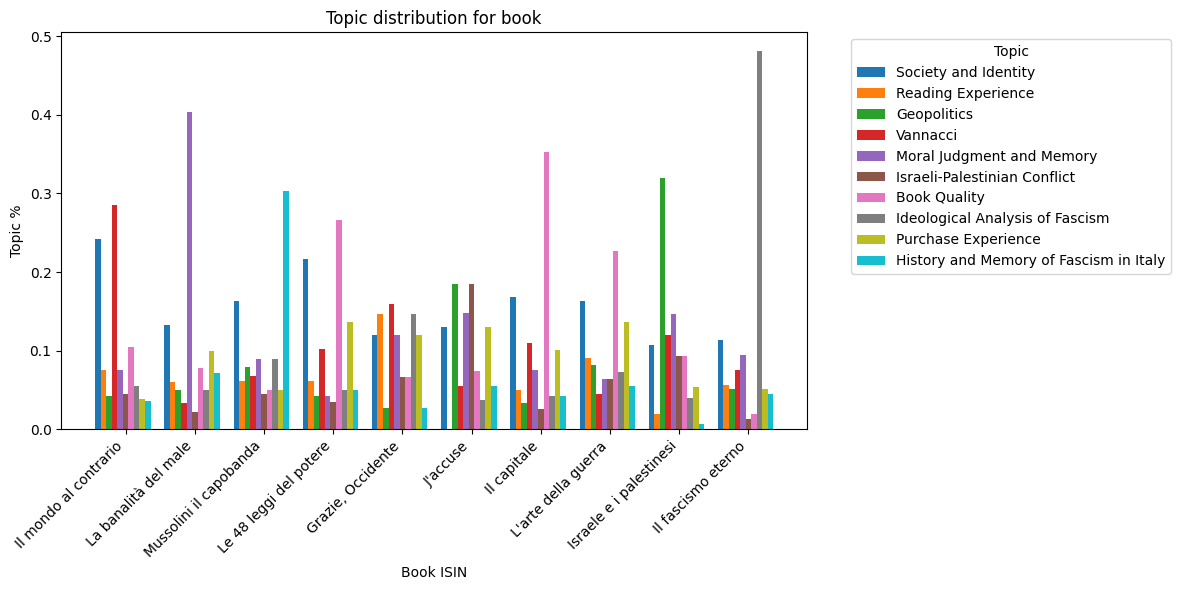

In [ ]:
full_text_topics = full_text_topics_en = [
    'Society and Identity',
    'Reading Experience',
    'Geopolitics',
    'Vannacci',
    'Moral Judgment and Memory',
    'Israeli-Palestinian Conflict',
    'Book Quality',
    'Ideological Analysis of Fascism',
    'Purchase Experience',
    'History and Memory of Fascism in Italy'
]

book_titles = [
    "Il mondo al contrario",
    "La banalità del male",
    "Mussolini il capobanda",
    "Le 48 leggi del potere",
    "Grazie, Occidente",
    "J'accuse",
    "Il capitale",
    "L'arte della guerra",
    "Israele e i palestinesi",
    "Il fascismo eterno"
]

import matplotlib.pyplot as plt

# Imposta la dimensione del grafico
plt.figure(figsize=(12, 6))

# Indici (i libri)
books = book_titles # df.index

# Posizione di ciascun gruppo di barre
import numpy as np
x = np.arange(len(books))
width = 0.08  # larghezza di ciascuna barra

# Per ogni topic, disegna le barre sfalsate
for i, topic in enumerate(df.columns):
    plt.  (x + i*width, df[topic], width, label=full_text_topics[i])

# Aggiunta etichette e leggenda
plt.xlabel('Book ISIN')
plt.ylabel('Topic %')
plt.title('Topic distribution for book')
plt.xticks(x + width*len(df.columns)/2, books, rotation=45, ha='right')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import math

def get_meta_path_neighbors(G, node, meta_path):
    """Get neighbors following a meta-path pattern"""
    if not meta_path:
        return {node}

    current_type = meta_path[0]
    if G.nodes[node].get('type') != current_type:
        return set()

    neighbors = set()
    for neighbor in G.neighbors(node):
        if len(meta_path) > 1:
            next_type = meta_path[1]
            if G.nodes[neighbor].get('type') == next_type:
                neighbors.update(get_meta_path_neighbors(G, neighbor, meta_path[1:]))
        else:
            if G.nodes[neighbor].get('type') == meta_path[0]:
                neighbors.add(neighbor)

    return neighbors

def calculate_pathsim(G, node1, node2, meta_path, use_weights=False):
    """Calculate PathSim between two nodes"""
    # Verify the meta-path is symmetric
    if meta_path[0] != meta_path[-1] or meta_path[0] != G.nodes[node1].get('type'):
        raise ValueError("Meta-path must be symmetric and match node types")

    # Get all paths from node1 to node2 following the meta-path
    def count_paths(source, target, path_types, current_path=None):
        if current_path is None:
            current_path = []

        current_path = current_path + [source]

        if len(current_path) == len(path_types):
            if source == target:
                return 1
            return 0

        count = 0
        for neighbor in G.neighbors(source):
            if G.nodes[neighbor].get('type') == path_types[len(current_path)]:
                # Apply weight if using weights and we're at an R node
                weight = 1
                if use_weights and G.nodes[source].get('type') == 'Y':
                    weight = G.nodes[source].get('weight', 1)
                count += weight * count_paths(neighbor, target, path_types, current_path)

        return count

    # Calculate numerator
    paths_x_y = count_paths(node1, node2, meta_path)
    paths_y_x = count_paths(node2, node1, meta_path)

    # Calculate denominators
    paths_x_x = count_paths(node1, node1, meta_path)
    paths_y_y = count_paths(node2, node2, meta_path)

    # Avoid division by zero
    if paths_x_x + paths_y_y == 0:
        return 0.0

    return (2 * (paths_x_y)) / (paths_x_x + paths_y_y) # (2 * (paths_x_y + paths_y_x)) / (paths_x_x + paths_y_y)

# Define our symmetric meta-path
meta_path = ['X', 'Y', 'T', 'Y', 'X']

# Calculate PathSim between B1 and B2
pathsim_score = calculate_pathsim(G, 'B0CF4BJN3D', '8807897458', meta_path)
print(f"PathSim(B1, B2) = {pathsim_score:.4f}")

# Calculate with review weights (incorporating R-U relations)
# weighted_pathsim = calculate_pathsim(G, 'B0CF4BJN3D', '8807897458', meta_path, use_weights=True)
# print(f"Weighted PathSim(B1, B2) = {weighted_pathsim:.4f}")

pathsim_score = calculate_pathsim(G, 'B0CF4BJN3D', '8893881284', meta_path)
print(f"PathSim(B1, B2) = {pathsim_score:.4f}")

# Vance  B01N3CYKW1
pathsim_score = calculate_pathsim(G, 'B0CF4BJN3D', 'B01N3CYKW1', meta_path)
print(f"PathSim(B1, B2) = {pathsim_score:.4f}")

# Vance  B01N3CYKW1
pathsim_score = calculate_pathsim(G, 'B0CF4BJN3D', 'B0CF4BJN3D', meta_path)
print(f"PathSim(B1, B2) = {pathsim_score:.4f}")

PathSim(B1, B2) = 0.3956
PathSim(B1, B2) = 0.6945
PathSim(B1, B2) = 0.2806
PathSim(B1, B2) = 1.0000


In [ ]:
path_sim_B0CF4BJN3D = []
for x_node in x_nodes:
  pathsim_score = calculate_pathsim(G, 'B0CF4BJN3D', x_node, meta_path)
  print(f"PathSim(B0CF4BJN3D, {x_node}) = {pathsim_score:.4f}")
  path_sim_B0CF4BJN3D.append((x_node, pathsim_score))


PathSim(B0CF4BJN3D, 8817188387) = 0.0000
PathSim(B0CF4BJN3D, 8807900521) = 0.3050
PathSim(B0CF4BJN3D, 8858053907) = 0.0029
PathSim(B0CF4BJN3D, B0DPJJVD32) = 0.1948
PathSim(B0CF4BJN3D, 8807036525) = 0.0955
PathSim(B0CF4BJN3D, B01N3CYKW1) = 0.2806
PathSim(B0CF4BJN3D, 8850503717) = 0.0000
PathSim(B0CF4BJN3D, 8891442631) = 0.0000
PathSim(B0CF4BJN3D, 8854530557) = 0.0043
PathSim(B0CF4BJN3D, B0DMGV3S36) = 0.0000
PathSim(B0CF4BJN3D, B0CF4BJN3D) = 1.0000
PathSim(B0CF4BJN3D, 8891442763) = 0.0000
PathSim(B0CF4BJN3D, 8891442348) = 0.0000
PathSim(B0CF4BJN3D, 8804789484) = 0.0300
PathSim(B0CF4BJN3D, 8891439495) = 0.0000
PathSim(B0CF4BJN3D, 8811014050) = 0.0000
PathSim(B0CF4BJN3D, 8893442418) = 0.3406
PathSim(B0CF4BJN3D, B0CLML6FM8) = 0.3854
PathSim(B0CF4BJN3D, 8896985625) = 0.4680
PathSim(B0CF4BJN3D, 8891438340) = 0.1118
PathSim(B0CF4BJN3D, 8830104957) = 0.3929
PathSim(B0CF4BJN3D, 8862509502) = 0.0000
PathSim(B0CF4BJN3D, 8858142675) = 0.0000
PathSim(B0CF4BJN3D, B0CTS4LK18) = 0.1452
PathSim(B0CF4BJN

In [ ]:
sorted(path_sim_B0CF4BJN3D, key=lambda x: -x[1])

[('B0CF4BJN3D', 1.0),
 ('8893881284', 0.6945206138451917),
 ('8804665289', 0.6019791575444434),
 ('8896985625', 0.46799331611727174),
 ('8804751169', 0.4167160472925308),
 ('8807897458', 0.3955949962578852),
 ('8830104957', 0.39286707839537083),
 ('B00DJ2KYQQ', 0.38845318532818535),
 ('B0CLML6FM8', 0.38535207987657555),
 ('8858043057', 0.3684853541523883),
 ('8811603692', 0.36205757432751295),
 ('8897109705', 0.3476875995378322),
 ('8893442418', 0.34059586814603876),
 ('B0DSM2GLDK', 0.3153192827933312),
 ('B076H8MFMJ', 0.3071111644082024),
 ('8807900521', 0.30498112972146846),
 ('B01N3CYKW1', 0.28063640381337207),
 ('8893780712', 0.27696497561593514),
 ('8804776455', 0.24228424767404555),
 ('8897109853', 0.22156133828996283),
 ('B09MYSV86T', 0.19956686168665352),
 ('B0DPJJVD32', 0.1947870311506675),
 ('B0CK1D7NYC', 0.173824),
 ('8836000185', 0.15091664787189485),
 ('B0CTS4LK18', 0.14517589239524056),
 ('8807894408', 0.14084965194196863),
 ('B0CB237DYY', 0.1346371790305346),
 ('17986063

In [ ]:
path_sim_8807897458 = []
for x_node in x_nodes:
  pathsim_score = calculate_pathsim(G, '8807897458', x_node, meta_path)
  print(f"PathSim(8807897458, {x_node}) = {pathsim_score:.4f}")
  path_sim_8807897458.append((x_node, pathsim_score))

PathSim(8807897458, 8817188387) = 0.0000
PathSim(8807897458, 8807900521) = 0.4613
PathSim(8807897458, 8858053907) = 0.0040
PathSim(8807897458, B0DPJJVD32) = 0.2831
PathSim(8807897458, 8807036525) = 0.1721
PathSim(8807897458, B01N3CYKW1) = 0.5490
PathSim(8807897458, 8850503717) = 0.0000
PathSim(8807897458, 8891442631) = 0.0000
PathSim(8807897458, 8854530557) = 0.0260
PathSim(8807897458, B0DMGV3S36) = 0.0000
PathSim(8807897458, B0CF4BJN3D) = 0.3956
PathSim(8807897458, 8891442763) = 0.0000
PathSim(8807897458, 8891442348) = 0.0000
PathSim(8807897458, 8804789484) = 0.0687
PathSim(8807897458, 8891439495) = 0.0000
PathSim(8807897458, 8811014050) = 0.0000
PathSim(8807897458, 8893442418) = 0.4008
PathSim(8807897458, B0CLML6FM8) = 0.5604
PathSim(8807897458, 8896985625) = 0.5628
PathSim(8807897458, 8891438340) = 0.1389
PathSim(8807897458, 8830104957) = 0.5145
PathSim(8807897458, 8862509502) = 0.0000
PathSim(8807897458, 8858142675) = 0.0000
PathSim(8807897458, B0CTS4LK18) = 0.2739
PathSim(88078974

In [ ]:
sorted(path_sim_8807897458, key=lambda x: -x[1])

[('8807897458', 1.0),
 ('8858043057', 0.6704647676161919),
 ('B076H8MFMJ', 0.6210977351560906),
 ('8804665289', 0.617770718490143),
 ('8893780712', 0.5827517447657029),
 ('8804751169', 0.5635675220866638),
 ('8896985625', 0.5627603888473454),
 ('B0CLML6FM8', 0.5604222613204927),
 ('B01N3CYKW1', 0.5489906450024619),
 ('8830104957', 0.5145255003227889),
 ('8893881284', 0.5058823529411764),
 ('B00DJ2KYQQ', 0.4673890393832048),
 ('8807900521', 0.46126719172446223),
 ('8897109705', 0.4404298028102491),
 ('B0DSM2GLDK', 0.4312773190869354),
 ('B0CK1D7NYC', 0.4093035343035343),
 ('8893442418', 0.4007608457092692),
 ('8811603692', 0.395820677924918),
 ('B0CF4BJN3D', 0.3955949962578852),
 ('8804776455', 0.38366596638655465),
 ('8836000185', 0.355739676600294),
 ('B0CB237DYY', 0.3108200300177378),
 ('8804772999', 0.283420200028173),
 ('B0DPJJVD32', 0.2830761447002277),
 ('B0CTS4LK18', 0.27393544887442367),
 ('1798606364', 0.2527379949452401),
 ('8807894408', 0.24485253199777407),
 ('8897109853', 

In [ ]:
# B0CB237DYY J'accuse, Francesca Albanese

path_sim_B0CB237DYY = []
for x_node in x_nodes:
  pathsim_score = calculate_pathsim(G, 'B0CB237DYY', x_node, meta_path)
  print(f"PathSim(B0CB237DYY, {x_node}) = {pathsim_score:.4f}")
  path_sim_B0CB237DYY.append((x_node, pathsim_score))

PathSim(B0CB237DYY, 8817188387) = 0.0000
PathSim(B0CB237DYY, 8807900521) = 0.6026
PathSim(B0CB237DYY, 8858053907) = 0.0200
PathSim(B0CB237DYY, B0DPJJVD32) = 0.4415
PathSim(B0CB237DYY, 8807036525) = 0.5893
PathSim(B0CB237DYY, B01N3CYKW1) = 0.6558
PathSim(B0CB237DYY, 8850503717) = 0.0000
PathSim(B0CB237DYY, 8891442631) = 0.0000
PathSim(B0CB237DYY, 8854530557) = 0.1042
PathSim(B0CB237DYY, B0DMGV3S36) = 0.0000
PathSim(B0CB237DYY, B0CF4BJN3D) = 0.1346
PathSim(B0CB237DYY, 8891442763) = 0.0000
PathSim(B0CB237DYY, 8891442348) = 0.0000
PathSim(B0CB237DYY, 8804789484) = 0.4037
PathSim(B0CB237DYY, 8891439495) = 0.0000
PathSim(B0CB237DYY, 8811014050) = 0.0000
PathSim(B0CB237DYY, 8893442418) = 0.1745
PathSim(B0CB237DYY, B0CLML6FM8) = 0.5101
PathSim(B0CB237DYY, 8896985625) = 0.5727
PathSim(B0CB237DYY, 8891438340) = 0.5592
PathSim(B0CB237DYY, 8830104957) = 0.3251
PathSim(B0CB237DYY, 8862509502) = 0.0000
PathSim(B0CB237DYY, 8858142675) = 0.0000
PathSim(B0CB237DYY, B0CTS4LK18) = 0.8213
PathSim(B0CB237D

In [ ]:
sorted(path_sim_B0CB237DYY, key=lambda x: -x[1])

[('B0CB237DYY', 1.0),
 ('885815553X', 0.8940397350993378),
 ('8836000185', 0.8763102725366876),
 ('B0CTS4LK18', 0.821301775147929),
 ('8858051793', 0.8056537102473498),
 ('1798606364', 0.7386172006745363),
 ('B0D5T7WZPK', 0.7151277013752456),
 ('8807894408', 0.7132018209408194),
 ('8804772999', 0.712280701754386),
 ('8893780712', 0.6903010033444816),
 ('B0CK1D7NYC', 0.6700942587832048),
 ('B01N3CYKW1', 0.6557993730407523),
 ('8897109853', 0.6502347417840375),
 ('8804776455', 0.6476540938362465),
 ('8817189782', 0.61003861003861),
 ('8807900521', 0.60262891809909),
 ('8807036525', 0.5892597968069666),
 ('B09R967KKQ', 0.5854700854700855),
 ('8804784601', 0.5782608695652174),
 ('8896985625', 0.5727401129943502),
 ('8891438340', 0.5591766723842195),
 ('8811603692', 0.5569917743830788),
 ('B09MYSV86T', 0.5480093676814989),
 ('8897109705', 0.5463917525773195),
 ('B0DSM2GLDK', 0.5436438195664909),
 ('8858043057', 0.5379746835443038),
 ('B0CLML6FM8', 0.5100702576112413),
 ('B076H8MFMJ', 0.4515

In [ ]:
#  Correlazione non parametrica (Spearman) X RELAZIOONE TRA USEFUL_NUM E TOKEN_LEN
from scipy.stats import spearmanr
final_dataset
spearmanr(final_dataset['useful_num'], final_dataset['TOKEN_LEN'])

SignificanceResult(statistic=np.float64(0.44915107029970447), pvalue=np.float64(1.5207482880738465e-185))

In [ ]:
final_dataset['num_emotions'] = final_dataset['MEANINGFUL_EMOTIONS'].apply(len)


In [ ]:
final_dataset['num_complex_emotions'] = final_dataset['COMPLEX_EMOTIONS'].apply(len)


In [ ]:
final_dataset['has_emotions'] = final_dataset['MEANINGFUL_EMOTIONS'].apply(lambda x: 1 if len(x) > 0 else 0)


In [ ]:
final_dataset['has_complex_emotions'] = final_dataset['COMPLEX_EMOTIONS'].apply(lambda x: 1 if len(x) > 0 else 0)


In [ ]:
final_dataset

,index,book_code,title_review,description_review,useful_description,useful_num,idx_2,topic_num,topic_description,EMO_ZSCORES,MEANINGFUL_EMOTIONS,TOKEN_LEN,COMPLEX_EMOTIONS,NODE_INDEX,num_emotions,num_complex_emotions,has_emotions,has_complex_emotions
0,0,B0CLML6FM8,Utile e ben fatto,E' uno dei resoconti piu' ordinati che abbia m...,9 persone l'hanno trovato utile,9,1,4,Giudizio morale e memoria,"{'anger': -0.818343699890104, 'trust': 1.99654...","[trust_above, surprise_above]",129,[curiosity],B0CLML6FM8RW0,2,1,1,1
1,1,B0CLML6FM8,attuale,Bel libro attuale e snocciola le problematiche...,Una persona l'ha trovato utile,1,2,5,Conflitto Israelo-Palestinese,"{'anger': -0.775421929962508, 'trust': 1.02689...",[],46,[],B0CLML6FM8RW1,0,0,0,0
2,2,B0CLML6FM8,israele e palestinesi,"interessante ma troppo denso di informazioni ,...",None,0,3,4,Giudizio morale e memoria,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[],11,[],B0CLML6FM8RW2,0,0,0,0
3,3,B0CLML6FM8,Molto articolato,Il Giornalista indipendente per antonomasia è ...,6 persone l'hanno trovato utile,6,4,3,Vannacci,"{'anger': 0.195412787498412, 'trust': 0.306916...",[],106,[],B0CLML6FM8RW3,0,0,0,0
4,4,B0CLML6FM8,Buono per una visione a volo d'uccello,Fornisce una ossatura cronologica degli eventi...,Una persona l'ha trovato utile,1,5,4,Giudizio morale e memoria,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[anticipation_above],34,[],B0CLML6FM8RW4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,3743,8807036525,Leggetelo.,"Parte bene da subito, questo bellissimo raccon...",Una persona l'ha trovato utile,1,3744,1,Esperienza di lettura,"{'anger': -1.324697860891705, 'trust': 3.10860...","[trust_above, surprise_above, anticipation_above]",70,"[hope, curiosity, confusion]",8807036525RW3743,3,3,1,1
3744,3744,8807036525,Ni,"Carino, ma nulla di eccezionale.",None,0,3745,1,Esperienza di lettura,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[joy_above],6,[],8807036525RW3744,1,0,1,0
3745,3745,8807036525,Un'occasione mancata,"Troppo sbrigativo, tutto troppo rapido. Si sen...",2 persone l'hanno trovato utile,2,3746,5,Conflitto Israelo-Palestinese,"{'anger': -1.270183118739682, 'trust': 1.04351...",[],102,[],8807036525RW3745,0,0,0,0
3746,3746,8807036525,Fantastico romanzo d'esordio!,"Già nel 1993, quando cominciò a farsi notare a...",Una persona l'ha trovato utile,1,3747,9,Storia e memoria del fascismo in Italia,"{'anger': -2.473580548122012, 'trust': 1.91482...","[anger_under, joy_above, fear_under, anticipat...",774,[optimism],8807036525RW3746,4,1,1,1


In [ ]:
# ANOVA A UMA VIA TRA HAS EMOTIONS E USFUL_NUM
from scipy.stats import f_oneway

f_oneway(final_dataset[final_dataset['has_emotions'] == 0]['useful_num'],
         final_dataset[final_dataset['has_emotions'] == 1]['useful_num'])

F_onewayResult(statistic=np.float64(2.366790382526565), pvalue=np.float64(0.12402610311120504))

In [ ]:
# ANOVA A UMA VIA TRA HAS EMOTIONS E USFUL_NUM
from scipy.stats import f_oneway

f_oneway(final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num'],
         final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num'])

F_onewayResult(statistic=np.float64(1.6353315378385065), pvalue=np.float64(0.20104642084217908))

In [ ]:
from scipy.stats import kruskal
kruskal(final_dataset[final_dataset['has_emotions'] == 0]['useful_num'],
         final_dataset[final_dataset['has_emotions'] == 1]['useful_num'])


KruskalResult(statistic=np.float64(0.000986158989945737), pvalue=np.float64(0.9749480143254224))

In [ ]:
from scipy.stats import kruskal
kruskal(final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num'],
         final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num'])

KruskalResult(statistic=np.float64(8.902183613035968), pvalue=np.float64(0.0028482984261469155))

In [ ]:
final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']

,useful_num
1,1
2,0
3,6
4,1
5,1
...,...
3741,0
3742,0
3744,0
3745,2


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# Gruppo A: review senza emozioni complesse
group_A = final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']

# Gruppo B: review con emozioni complesse
group_B = final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num']

# Applichiamo il test di Mann-Whitney U
statistic, p_value = mannwhitneyu(group_A, group_B, alternative='greater')

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

result_mann_w_u_complex = mannwhitneyu(group_A, group_B, alternative='greater')
print(result_mann_w_u_complex)

Statistic: 1462916.0
P-value: 0.0014242348351336017
MannwhitneyuResult(statistic=np.float64(1462916.0), pvalue=np.float64(0.0014242348351336017))


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# Gruppo A: review senza emozioni complesse
group_A = final_dataset[final_dataset['has_emotions'] == 0]['useful_num']

# Gruppo B: review con emozioni complesse
group_B = final_dataset[final_dataset['has_emotions'] == 1]['useful_num']

# Applichiamo il test di Mann-Whitney U
statistic, p_value = mannwhitneyu(group_A, group_B, alternative='greater')

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

result_mann_w_u_complex = mannwhitneyu(group_A, group_B, alternative='greater')
print(result_mann_w_u_complex)

Statistic: 1595972.5
P-value: 0.5125328167509862
MannwhitneyuResult(statistic=np.float64(1595972.5), pvalue=np.float64(0.5125328167509862))


In [ ]:
print(len(final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']))
print((final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']).min())
print((final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']).max())
print((final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']).mean())
print((final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']).quantile(0.5))
print(len(final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num']))
print((final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num']).min())
print((final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num']).max())
print((final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num']).mean())
print((final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num']).quantile(0.5))

2739
0
824
5.02373128879153
0.0
1009
0
593
3.8017839444995043
0.0


ShapiroResult(statistic=np.float64(0.15093621639863475), pvalue=np.float64(6.877567317608895e-77))
ShapiroResult(statistic=np.float64(0.12669054329346574), pvalue=np.float64(1.5243093212406935e-55))


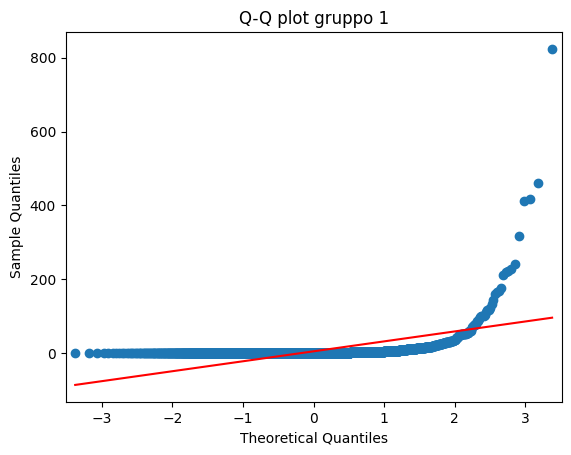

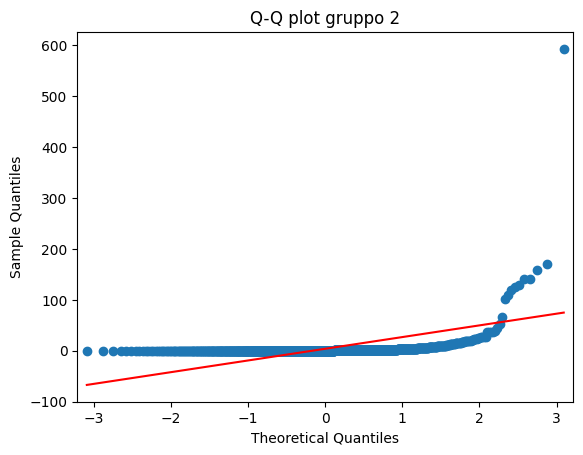

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Supponi di avere 3 gruppi
gruppo1 = final_dataset[final_dataset['has_complex_emotions'] == 0]['useful_num']
gruppo2 = final_dataset[final_dataset['has_complex_emotions'] == 1]['useful_num']


# Test di Shapiro-Wilk
print(shapiro(gruppo1))
print(shapiro(gruppo2))

# Q-Q plot
sm.qqplot(gruppo1, line='s')
plt.title("Q-Q plot gruppo 1")
plt.show()

sm.qqplot(gruppo2, line='s')
plt.title("Q-Q plot gruppo 2")
plt.show()

ShapiroResult(statistic=np.float64(0.2630747083257702), pvalue=np.float64(7.475023032578574e-58))
ShapiroResult(statistic=np.float64(0.13545843827614257), pvalue=np.float64(1.7122419665157298e-74))


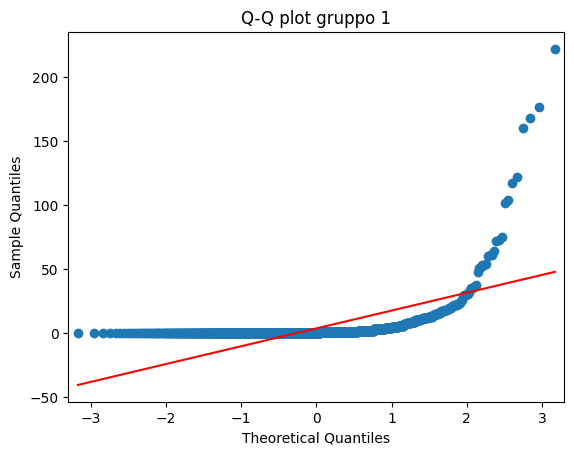

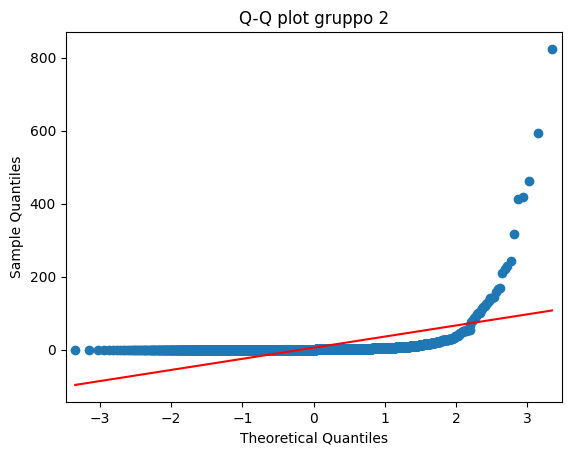

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Supponi di avere 3 gruppi
gruppo1 = final_dataset[final_dataset['has_emotions'] == 0]['useful_num']
gruppo2 = final_dataset[final_dataset['has_emotions'] == 1]['useful_num']


# Test di Shapiro-Wilk
print(shapiro(gruppo1))
print(shapiro(gruppo2))

# Q-Q plot
sm.qqplot(gruppo1, line='s')
plt.title("Q-Q plot gruppo 1")
plt.show()

sm.qqplot(gruppo2, line='s')
plt.title("Q-Q plot gruppo 2")
plt.show()

In [ ]:
# CREO LA TABELLA DI CONTINGENZA DELLE EMOZIONI PER IL TEST CHI-QUADRO

# Esplodi le emozioni in righe separate
df_exploded = final_dataset[['topic_description', 'MEANINGFUL_EMOTIONS']].explode('MEANINGFUL_EMOTIONS')
print('df_exploded')
print(df_exploded)
# Rinomina per comodità
df_exploded = df_exploded.rename(columns={'MEANINGFUL_EMOTIONS': 'emotion'})

# Crea tabella con conteggi: righe = topic, colonne = emozioni
emotion_counts = pd.crosstab(df_exploded['topic_description'], df_exploded['emotion'])
print(emotion_counts)
# (Opzionale) Ordina le colonne alfabeticamente o per somma
emotion_counts = emotion_counts.sort_index(axis=1)

df_exploded
                            topic_description MEANINGFUL_EMOTIONS
0                   Giudizio morale e memoria         trust_above
0                   Giudizio morale e memoria      surprise_above
1               Conflitto Israelo-Palestinese                 NaN
2                   Giudizio morale e memoria                 NaN
3                                    Vannacci                 NaN
...                                       ...                 ...
3746  Storia e memoria del fascismo in Italia         anger_under
3746  Storia e memoria del fascismo in Italia           joy_above
3746  Storia e memoria del fascismo in Italia          fear_under
3746  Storia e memoria del fascismo in Italia  anticipation_above
3747                Giudizio morale e memoria                 NaN

[5757 rows x 2 columns]
emotion                                  anger_above  anger_under  \
topic_description                                                   
Analisi ideologica del fascismo  

In [ ]:
emotion_counts

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above
topic_description,,,,,,,,,,,,,
Analisi ideologica del fascismo,15,3,93,9,9,28,8,74,0,36,2,33,137
Conflitto Israelo-Palestinese,11,3,57,11,2,11,7,34,0,23,1,18,77
Esperienza di lettura,11,1,42,7,2,14,3,50,0,22,0,15,70
Esperienza d’acquisto,11,7,107,9,6,17,10,71,0,20,2,20,93
Geopolitica,15,6,103,8,2,25,9,58,0,33,2,24,158
Giudizio morale e memoria,25,8,152,10,8,25,19,78,1,35,3,34,180
Qualità del libro,20,6,124,13,1,17,10,79,0,44,0,30,149
Società e identità,16,6,166,22,3,18,11,147,1,76,1,78,235
Storia e memoria del fascismo in Italia,20,3,64,8,3,28,1,58,0,46,0,32,99


In [ ]:
emotion_contigency_percentage = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)
emotion_contigency_percentage

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above
topic_description,,,,,,,,,,,,,
Analisi ideologica del fascismo,0.033557,0.006711,0.208054,0.020134,0.020134,0.062640,0.017897,0.165548,0.000000,0.080537,0.004474,0.073826,0.306488
Conflitto Israelo-Palestinese,0.043137,0.011765,0.223529,0.043137,0.007843,0.043137,0.027451,0.133333,0.000000,0.090196,0.003922,0.070588,0.301961
Esperienza di lettura,0.046414,0.004219,0.177215,0.029536,0.008439,0.059072,0.012658,0.210970,0.000000,0.092827,0.000000,0.063291,0.295359
Esperienza d’acquisto,0.029491,0.018767,0.286863,0.024129,0.016086,0.045576,0.026810,0.190349,0.000000,0.053619,0.005362,0.053619,0.249330
Geopolitica,0.033860,0.013544,0.232506,0.018059,0.004515,0.056433,0.020316,0.130926,0.000000,0.074492,0.004515,0.054176,0.356659
Giudizio morale e memoria,0.043253,0.013841,0.262976,0.017301,0.013841,0.043253,0.032872,0.134948,0.001730,0.060554,0.005190,0.058824,0.311419
Qualità del libro,0.040568,0.012170,0.251521,0.026369,0.002028,0.034483,0.020284,0.160243,0.000000,0.089249,0.000000,0.060852,0.302231
Società e identità,0.020513,0.007692,0.212821,0.028205,0.003846,0.023077,0.014103,0.188462,0.001282,0.097436,0.001282,0.100000,0.301282
Storia e memoria del fascismo in Italia,0.055249,0.008287,0.176796,0.022099,0.008287,0.077348,0.002762,0.160221,0.000000,0.127072,0.000000,0.088398,0.273481


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Esegui il test del chi-quadrato
chi2, p, dof, expected = chi2_contingency(emotion_counts)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"dof: {dof}")

Chi-square statistic: 214.6378609174688
P-value: 4.735719708192554e-09
dof: 108


In [ ]:
# CREO LA TABELLA DI CONTINGENZA DELLE EMOZIONI compleesee PER IL TEST CHI-QUADRO

# Esplodi le emozioni in righe separate
df_exploded_c_emotions = final_dataset[['topic_description', 'COMPLEX_EMOTIONS']].explode('COMPLEX_EMOTIONS')
print('df_exploded_c_emotions')
print(df_exploded_c_emotions)
# Rinomina per comodità
df_exploded_c_emotions = df_exploded_c_emotions.rename(columns={'COMPLEX_EMOTIONS': 'complex_emotion'})

# Crea tabella con conteggi: righe = topic, colonne = emozioni
complex_emotion_counts = pd.crosstab(df_exploded_c_emotions['topic_description'], df_exploded_c_emotions['complex_emotion'])
print(complex_emotion_counts)
# (Opzionale) Ordina le colonne alfabeticamente o per somma
complex_emotion_counts = complex_emotion_counts.sort_index(axis=1)

df_exploded_c_emotions
                            topic_description COMPLEX_EMOTIONS
0                   Giudizio morale e memoria        curiosity
1               Conflitto Israelo-Palestinese              NaN
2                   Giudizio morale e memoria              NaN
3                                    Vannacci              NaN
4                   Giudizio morale e memoria              NaN
...                                       ...              ...
3743                    Esperienza di lettura        confusion
3744                    Esperienza di lettura              NaN
3745            Conflitto Israelo-Palestinese              NaN
3746  Storia e memoria del fascismo in Italia         optimism
3747                Giudizio morale e memoria              NaN

[5927 rows x 2 columns]
complex_emotion                          aggressiveness  ambivalence  anxiety  \
topic_description                                                               
Analisi ideologica del fascismo   

In [ ]:
complex_emotion_counts[]

complex_emotion,aggressiveness,ambivalence,anxiety,awe,bittersweetness,confusion,contempt,curiosity,cynicism,delight,...,hope,morbidness,optimism,pessimism,pride,remorse,resignation,shame,submission,unbelief
topic_description,,,,,,,,,,,,,,,,,,,,,
Analisi ideologica del fascismo,5,5,9,4,10,27,6,18,2,23,...,46,3,30,11,5,4,14,5,14,0
Conflitto Israelo-Palestinese,0,1,4,2,2,14,5,11,4,11,...,25,0,18,6,0,7,4,7,3,1
Esperienza di lettura,2,2,2,2,6,7,5,7,0,7,...,19,1,12,2,1,6,9,5,4,1
Esperienza d’acquisto,3,4,3,2,7,17,4,13,4,14,...,44,2,36,8,2,4,4,4,2,2
Geopolitica,1,3,3,1,7,15,5,13,3,15,...,46,2,35,11,2,5,15,6,10,1
Giudizio morale e memoria,3,2,6,2,7,24,7,19,2,15,...,56,1,36,9,3,8,12,6,8,1
Qualità del libro,2,6,3,2,9,23,10,23,3,19,...,63,0,42,9,0,8,16,6,8,1
Società e identità,1,4,4,3,36,61,11,53,0,54,...,91,2,70,36,2,13,39,6,5,0
Storia e memoria del fascismo in Italia,4,3,5,0,22,28,7,23,4,25,...,37,1,29,19,2,5,25,7,13,0


In [ ]:
complex_emotion_contigency_percentage = complex_emotion_counts.div(complex_emotion_counts.sum(axis=1), axis=0)
complex_emotion_contigency_percentage

complex_emotion,aggressiveness,ambivalence,anxiety,awe,bittersweetness,confusion,contempt,curiosity,cynicism,delight,...,hope,morbidness,optimism,pessimism,pride,remorse,resignation,shame,submission,unbelief
topic_description,,,,,,,,,,,,,,,,,,,,,
Analisi ideologica del fascismo,0.014881,0.014881,0.026786,0.011905,0.029762,0.080357,0.017857,0.053571,0.005952,0.068452,...,0.136905,0.008929,0.089286,0.032738,0.014881,0.011905,0.041667,0.014881,0.041667,0.000000
Conflitto Israelo-Palestinese,0.000000,0.005848,0.023392,0.011696,0.011696,0.081871,0.029240,0.064327,0.023392,0.064327,...,0.146199,0.000000,0.105263,0.035088,0.000000,0.040936,0.023392,0.040936,0.017544,0.005848
Esperienza di lettura,0.012739,0.012739,0.012739,0.012739,0.038217,0.044586,0.031847,0.044586,0.000000,0.044586,...,0.121019,0.006369,0.076433,0.012739,0.006369,0.038217,0.057325,0.031847,0.025478,0.006369
Esperienza d’acquisto,0.012245,0.016327,0.012245,0.008163,0.028571,0.069388,0.016327,0.053061,0.016327,0.057143,...,0.179592,0.008163,0.146939,0.032653,0.008163,0.016327,0.016327,0.016327,0.008163,0.008163
Geopolitica,0.003436,0.010309,0.010309,0.003436,0.024055,0.051546,0.017182,0.044674,0.010309,0.051546,...,0.158076,0.006873,0.120275,0.037801,0.006873,0.017182,0.051546,0.020619,0.034364,0.003436
Giudizio morale e memoria,0.009554,0.006369,0.019108,0.006369,0.022293,0.076433,0.022293,0.060510,0.006369,0.047771,...,0.178344,0.003185,0.114650,0.028662,0.009554,0.025478,0.038217,0.019108,0.025478,0.003185
Qualità del libro,0.005510,0.016529,0.008264,0.005510,0.024793,0.063361,0.027548,0.063361,0.008264,0.052342,...,0.173554,0.000000,0.115702,0.024793,0.000000,0.022039,0.044077,0.016529,0.022039,0.002755
Società e identità,0.001558,0.006231,0.006231,0.004673,0.056075,0.095016,0.017134,0.082555,0.000000,0.084112,...,0.141745,0.003115,0.109034,0.056075,0.003115,0.020249,0.060748,0.009346,0.007788,0.000000
Storia e memoria del fascismo in Italia,0.010989,0.008242,0.013736,0.000000,0.060440,0.076923,0.019231,0.063187,0.010989,0.068681,...,0.101648,0.002747,0.079670,0.052198,0.005495,0.013736,0.068681,0.019231,0.035714,0.000000


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Esegui il test del chi-quadrato
chi2, p, dof, expected = chi2_contingency(complex_emotion_counts)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"dof: {dof}")

Chi-square statistic: 358.212539244621
P-value: 1.2096627862377577e-05
dof: 252


In [ ]:
emotion_counts['total_emotions'] = emotion_counts.sum(axis=1)
emotion_counts

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above,total_emotions
topic_description,,,,,,,,,,,,,,
Analisi ideologica del fascismo,15,3,93,9,9,28,8,74,0,36,2,33,137,447
Conflitto Israelo-Palestinese,11,3,57,11,2,11,7,34,0,23,1,18,77,255
Esperienza di lettura,11,1,42,7,2,14,3,50,0,22,0,15,70,237
Esperienza d’acquisto,11,7,107,9,6,17,10,71,0,20,2,20,93,373
Geopolitica,15,6,103,8,2,25,9,58,0,33,2,24,158,443
Giudizio morale e memoria,25,8,152,10,8,25,19,78,1,35,3,34,180,578
Qualità del libro,20,6,124,13,1,17,10,79,0,44,0,30,149,493
Società e identità,16,6,166,22,3,18,11,147,1,76,1,78,235,780
Storia e memoria del fascismo in Italia,20,3,64,8,3,28,1,58,0,46,0,32,99,362


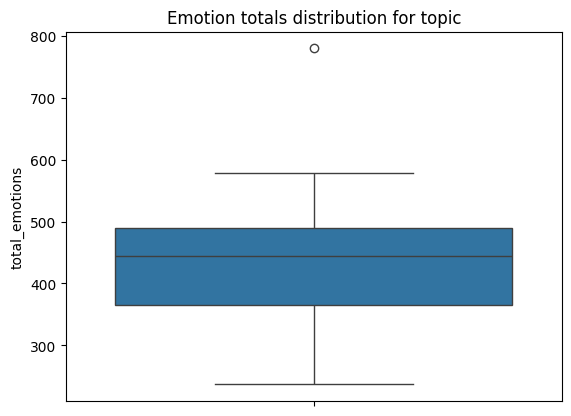

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=emotion_counts['total_emotions'])
plt.title('Emotion totals distribution for topic')
plt.show()

In [ ]:
complex_emotion_counts['total_complex_emotions'] = complex_emotion_counts.sum(axis=1)
complex_emotion_counts

complex_emotion,aggressiveness,ambivalence,anxiety,awe,bittersweetness,confusion,contempt,curiosity,cynicism,delight,...,morbidness,optimism,pessimism,pride,remorse,resignation,shame,submission,unbelief,total_complex_emotions
topic_description,,,,,,,,,,,,,,,,,,,,,
Analisi ideologica del fascismo,5,5,9,4,10,27,6,18,2,23,...,3,30,11,5,4,14,5,14,0,336
Conflitto Israelo-Palestinese,0,1,4,2,2,14,5,11,4,11,...,0,18,6,0,7,4,7,3,1,171
Esperienza di lettura,2,2,2,2,6,7,5,7,0,7,...,1,12,2,1,6,9,5,4,1,157
Esperienza d’acquisto,3,4,3,2,7,17,4,13,4,14,...,2,36,8,2,4,4,4,2,2,245
Geopolitica,1,3,3,1,7,15,5,13,3,15,...,2,35,11,2,5,15,6,10,1,291
Giudizio morale e memoria,3,2,6,2,7,24,7,19,2,15,...,1,36,9,3,8,12,6,8,1,314
Qualità del libro,2,6,3,2,9,23,10,23,3,19,...,0,42,9,0,8,16,6,8,1,363
Società e identità,1,4,4,3,36,61,11,53,0,54,...,2,70,36,2,13,39,6,5,0,642
Storia e memoria del fascismo in Italia,4,3,5,0,22,28,7,23,4,25,...,1,29,19,2,5,25,7,13,0,364


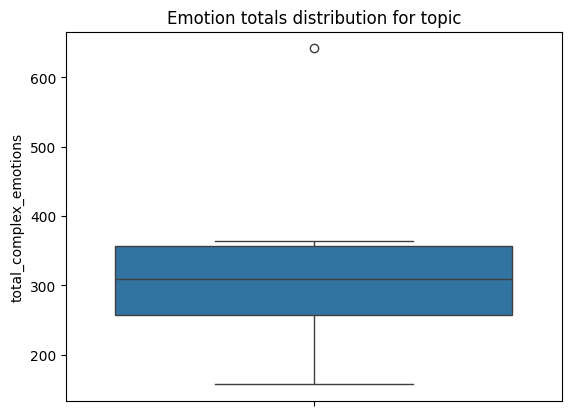

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=complex_emotion_counts['total_complex_emotions'])
plt.title('Emotion totals distribution for topic')
plt.show()

In [ ]:
rename_dict = {
    'Società e identità': 'Society and Identity',
    'Esperienza di lettura': 'Reading Experience',
    'Geopolitica': 'Geopolitics',
    'Vannacci': 'Vannacci',
    'Giudizio morale e memoria': 'Moral Judgment and Memory',
    'Conflitto Israelo-Palestinese': 'Israeli-Palestinian Conflict',
    'Qualità del libro': 'Book Quality',
    'Analisi ideologica del fascismo': 'Ideological Analysis of Fascism',
    'Esperienza d’acquisto': 'Purchase Experience',
    'Storia e memoria del fascismo in Italia': 'History and Memory of Fascism in Italy'
}
emotion_contigency_percentage = emotion_contigency_percentage.rename(index=rename_dict)


In [ ]:
emotion_contigency_percentage

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above
topic_description,,,,,,,,,,,,,
Ideological Analysis of Fascism,0.033557,0.006711,0.208054,0.020134,0.020134,0.062640,0.017897,0.165548,0.000000,0.080537,0.004474,0.073826,0.306488
Israeli-Palestinian Conflict,0.043137,0.011765,0.223529,0.043137,0.007843,0.043137,0.027451,0.133333,0.000000,0.090196,0.003922,0.070588,0.301961
Reading Experience,0.046414,0.004219,0.177215,0.029536,0.008439,0.059072,0.012658,0.210970,0.000000,0.092827,0.000000,0.063291,0.295359
Purchase Experience,0.029491,0.018767,0.286863,0.024129,0.016086,0.045576,0.026810,0.190349,0.000000,0.053619,0.005362,0.053619,0.249330
Geopolitics,0.033860,0.013544,0.232506,0.018059,0.004515,0.056433,0.020316,0.130926,0.000000,0.074492,0.004515,0.054176,0.356659
Moral Judgment and Memory,0.043253,0.013841,0.262976,0.017301,0.013841,0.043253,0.032872,0.134948,0.001730,0.060554,0.005190,0.058824,0.311419
Book Quality,0.040568,0.012170,0.251521,0.026369,0.002028,0.034483,0.020284,0.160243,0.000000,0.089249,0.000000,0.060852,0.302231
Society and Identity,0.020513,0.007692,0.212821,0.028205,0.003846,0.023077,0.014103,0.188462,0.001282,0.097436,0.001282,0.100000,0.301282
History and Memory of Fascism in Italy,0.055249,0.008287,0.176796,0.022099,0.008287,0.077348,0.002762,0.160221,0.000000,0.127072,0.000000,0.088398,0.273481


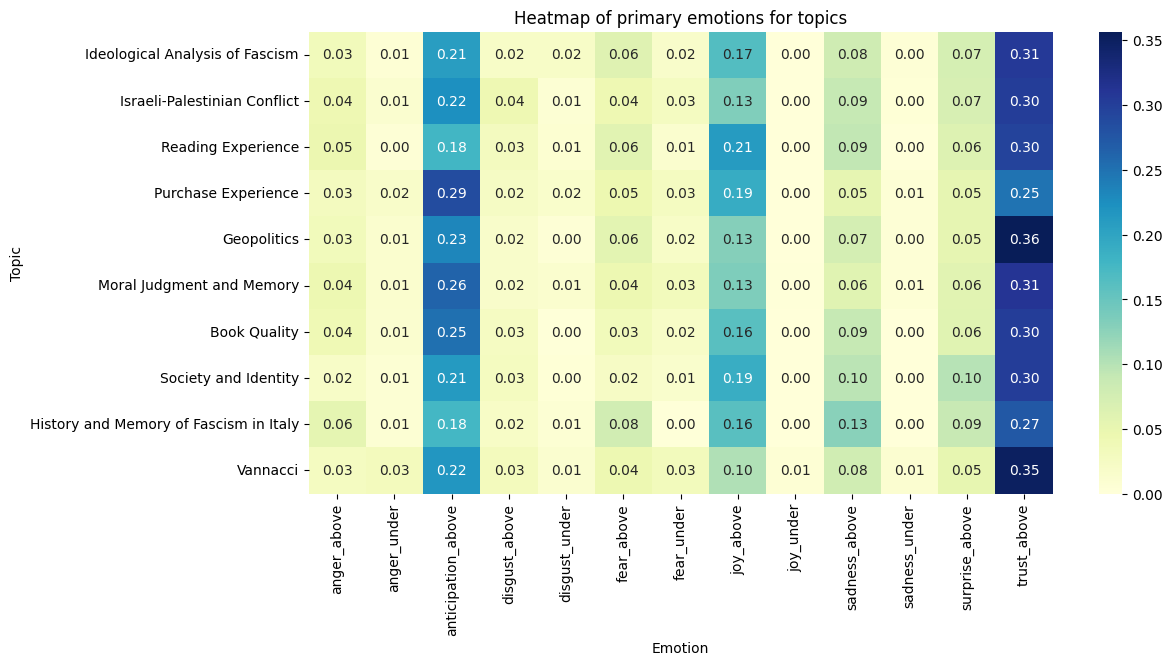

In [ ]:
#NOTA RICORDATI CHE EMOTION_PERCENTAGE DEVE ESSERE TOLTA LA COLONNA COI TOTALI PRESA PRECEDENTEMENTE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(emotion_contigency_percentage, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of primary emotions for topics")
plt.xlabel("Emotion")
plt.ylabel("Topic")
plt.show()

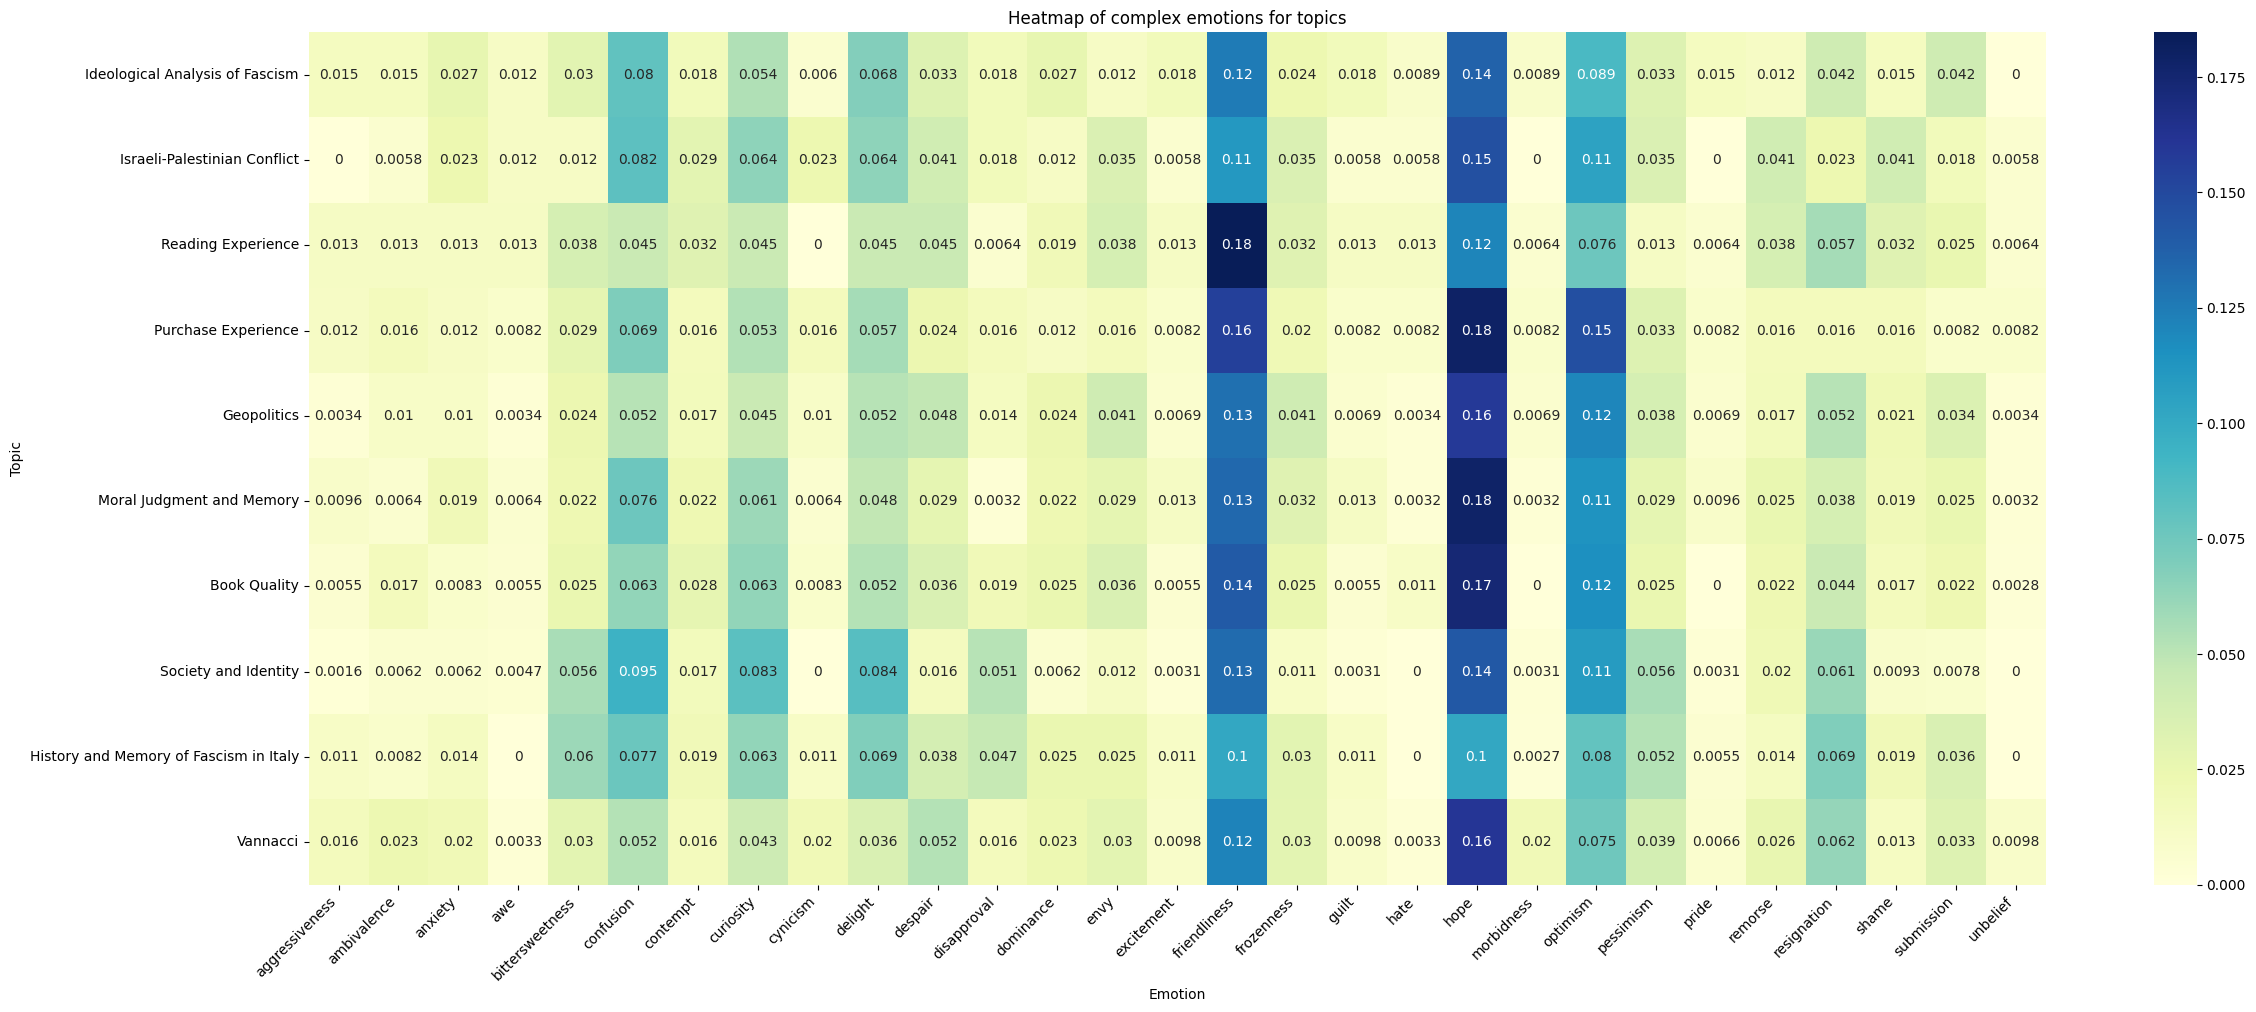

In [ ]:
#NOTA RICORDATI CHE EMOTION_PERCENTAGE DEVE ESSERE TOLTA LA COLONNA COI TOTALI PRESA PRECEDENTEMENTE
import seaborn as sns
import matplotlib.pyplot as plt

complex_emotion_contigency_percentage = complex_emotion_contigency_percentage.rename(index=rename_dict)

plt.figure(figsize=(25, 10))  # Increase width here (20 is an example)
sns.heatmap(complex_emotion_contigency_percentage, annot=True, cmap="YlGnBu")  # Customize as needed
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better fit
plt.tight_layout()  # Adjust layout to prevent clipping
plt.title("Heatmap of complex emotions for topics")
plt.xlabel("Emotion")
plt.ylabel("Topic")
plt.show()

In [ ]:
complex_emotion_contigency_percentage

complex_emotion,aggressiveness,ambivalence,anxiety,awe,bittersweetness,confusion,contempt,curiosity,cynicism,delight,...,hope,morbidness,optimism,pessimism,pride,remorse,resignation,shame,submission,unbelief
topic_description,,,,,,,,,,,,,,,,,,,,,
Ideological Analysis of Fascism,0.014881,0.014881,0.026786,0.011905,0.029762,0.080357,0.017857,0.053571,0.005952,0.068452,...,0.136905,0.008929,0.089286,0.032738,0.014881,0.011905,0.041667,0.014881,0.041667,0.000000
Israeli-Palestinian Conflict,0.000000,0.005848,0.023392,0.011696,0.011696,0.081871,0.029240,0.064327,0.023392,0.064327,...,0.146199,0.000000,0.105263,0.035088,0.000000,0.040936,0.023392,0.040936,0.017544,0.005848
Reading Experience,0.012739,0.012739,0.012739,0.012739,0.038217,0.044586,0.031847,0.044586,0.000000,0.044586,...,0.121019,0.006369,0.076433,0.012739,0.006369,0.038217,0.057325,0.031847,0.025478,0.006369
Purchase Experience,0.012245,0.016327,0.012245,0.008163,0.028571,0.069388,0.016327,0.053061,0.016327,0.057143,...,0.179592,0.008163,0.146939,0.032653,0.008163,0.016327,0.016327,0.016327,0.008163,0.008163
Geopolitics,0.003436,0.010309,0.010309,0.003436,0.024055,0.051546,0.017182,0.044674,0.010309,0.051546,...,0.158076,0.006873,0.120275,0.037801,0.006873,0.017182,0.051546,0.020619,0.034364,0.003436
Moral Judgment and Memory,0.009554,0.006369,0.019108,0.006369,0.022293,0.076433,0.022293,0.060510,0.006369,0.047771,...,0.178344,0.003185,0.114650,0.028662,0.009554,0.025478,0.038217,0.019108,0.025478,0.003185
Book Quality,0.005510,0.016529,0.008264,0.005510,0.024793,0.063361,0.027548,0.063361,0.008264,0.052342,...,0.173554,0.000000,0.115702,0.024793,0.000000,0.022039,0.044077,0.016529,0.022039,0.002755
Society and Identity,0.001558,0.006231,0.006231,0.004673,0.056075,0.095016,0.017134,0.082555,0.000000,0.084112,...,0.141745,0.003115,0.109034,0.056075,0.003115,0.020249,0.060748,0.009346,0.007788,0.000000
History and Memory of Fascism in Italy,0.010989,0.008242,0.013736,0.000000,0.060440,0.076923,0.019231,0.063187,0.010989,0.068681,...,0.101648,0.002747,0.079670,0.052198,0.005495,0.013736,0.068681,0.019231,0.035714,0.000000


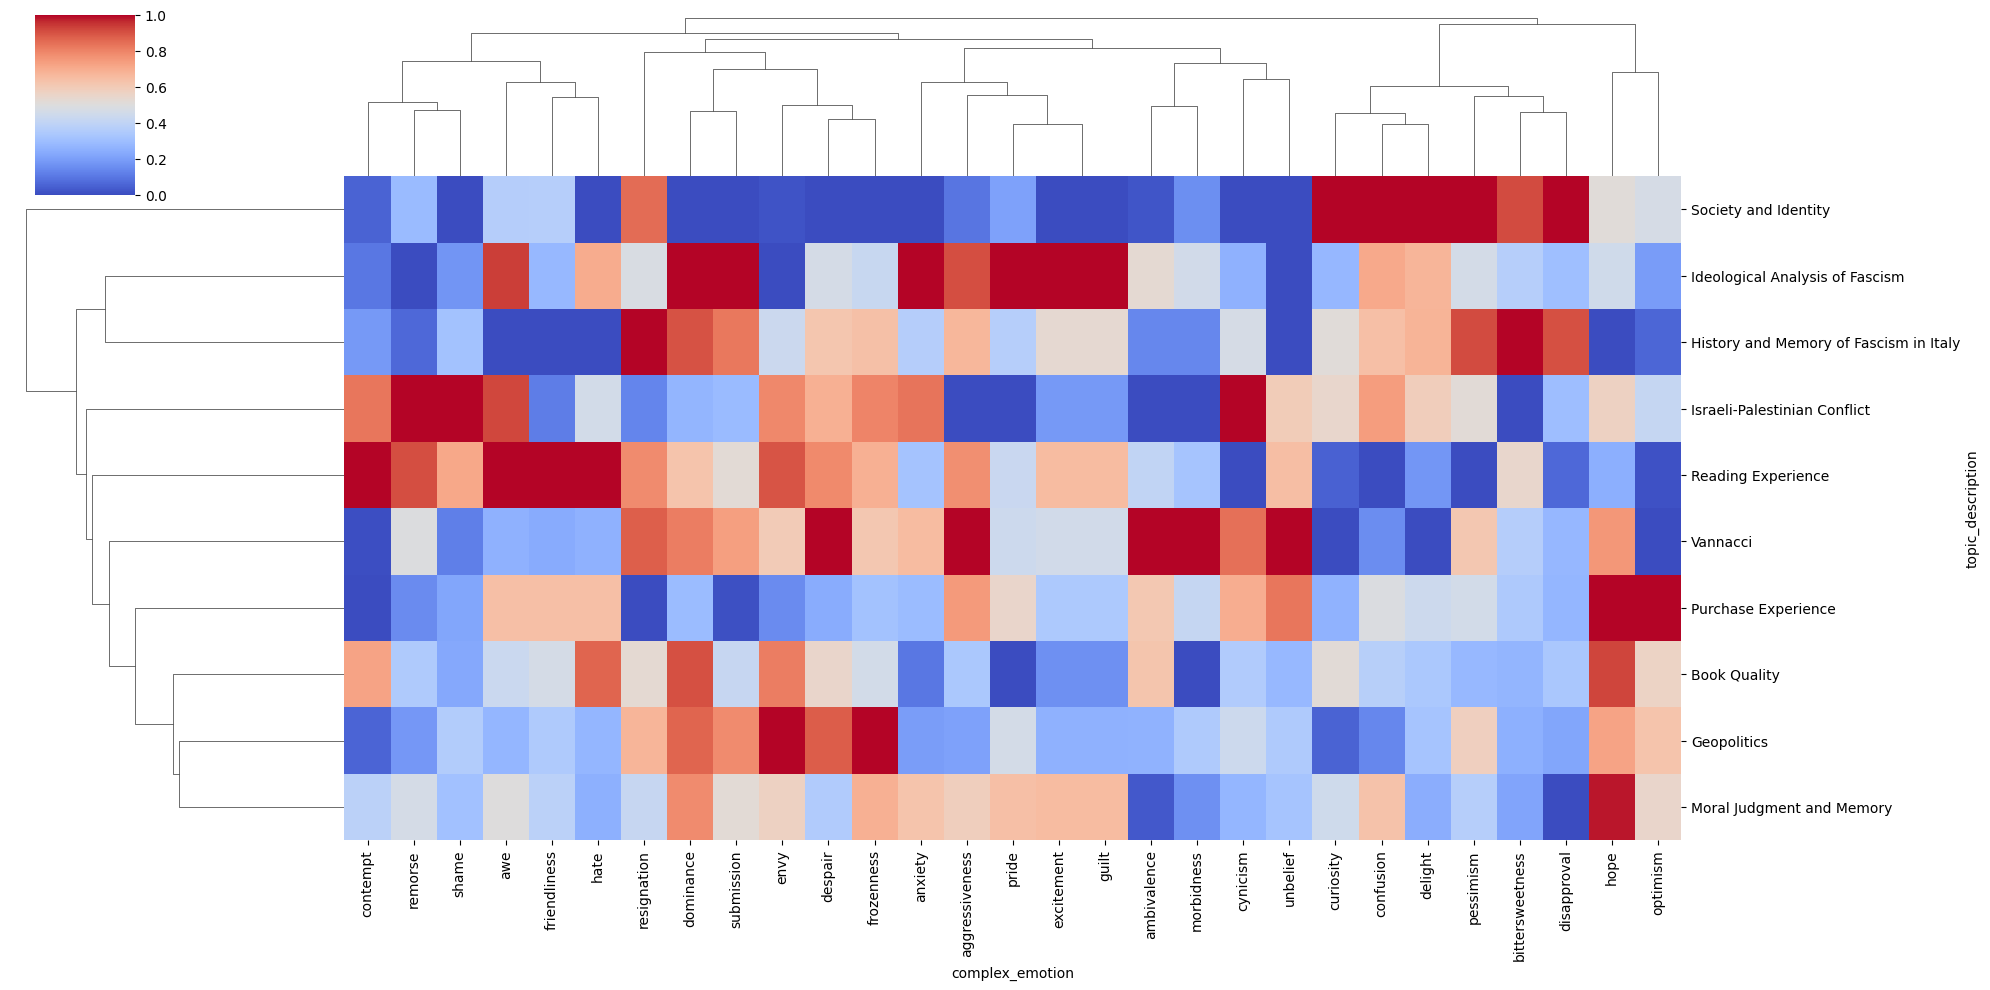

In [ ]:
sns.clustermap(complex_emotion_contigency_percentage, cmap="coolwarm", figsize=(20, 10), standard_scale=1)


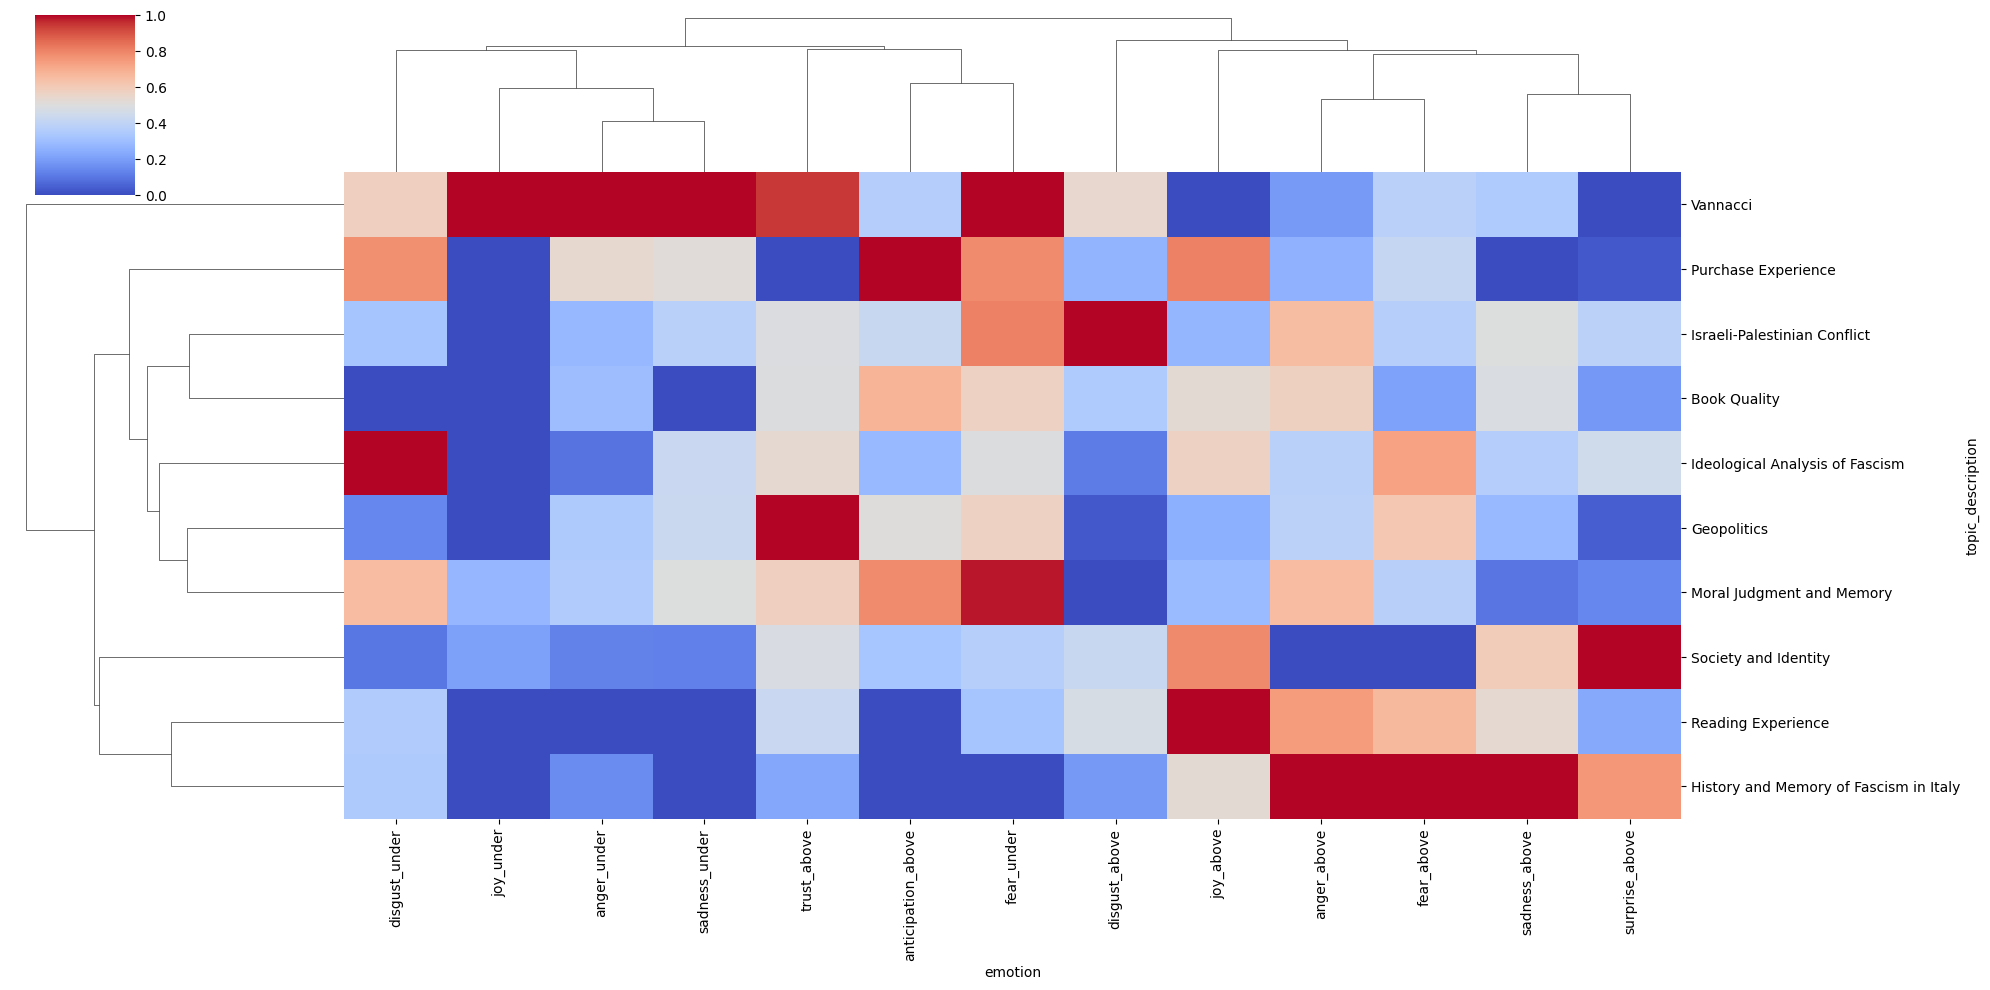

In [ ]:
sns.clustermap(emotion_contigency_percentage, cmap="coolwarm", figsize=(20, 10), standard_scale=1)
